# Prova Pratica Paradigmas de Aprendizagem de maquina

Aluno: Augusto Miguel Faustino Dos Santos

Matricula: 20210024765

In [1]:
#aumentado a capacidade de visualização de colunas e linhas
import pandas as pd

pd.set_option('display.max_columns', 7000)
pd.set_option('display.max_rows',90000)

# Pre Processamento

## Carregando os dados 

In [37]:
# Carregar e normalizar o DataFrame do sinais.csv

sinais = pd.read_csv('sinais.csv')
print(sinais.iloc[0])


file_name       Adição_AP_10.json
width                         738
height                       1008
duration_sec             4.533333
num_frames                    136
sinal                      Adição
interprete                Alexson
Name: 0, dtype: object


In [38]:
len(sinais)

2502

## corrigindo nome de arquivo 

Por acaso quando tava olhando o csv achei uma linha sem o nome do arquivo

Bolsa de estudo_CS_10.json,634,858,7.033333333333333,211,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_1.json,644,858,3.1333333333333333,94,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_2.json,648,860,5.166666666666667,155,Bolsa de Estudos,Cecilia
,632,860,5.166666666666667,155,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_4.json,640,860,5.133333333333334,154,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_5.json,624,858,4.6,138,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_6.json,654,858,4.933333333333334,148,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_7.json,640,858,4.966666666666667,149,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_8.json,646,860,5.133333333333334,154,Bolsa de Estudos,Cecilia
Bolsa de estudo_CS_9.json,634,858,4.466666666666667,134,Bolsa de Estudos,Cecilia

In [ ]:

# Criar a condição de busca com todos os valores conhecidos
condicao = (sinais['width'] == 632) & \
           (sinais['height'] == 860) & \
           (sinais['num_frames'] == 155) & \
           (sinais['sinal'] == 'Bolsa de Estudos') & \
           (sinais['interprete'] == 'Cecilia')

#  Localizar e exibir a linha 
linha_encontrada = sinais[condicao]

print("--- Linha encontrada com base nos valores ---")
print(linha_encontrada)

# corrigir o nome do arquivo para a linha encontrada
nome_arquivo_faltante = 'Bolsa de estudo_CS_3.json' 
sinais.loc[condicao, 'file_name'] = nome_arquivo_faltante

print("\n--- Verificação após inserir o nome do arquivo ---")
print(sinais[condicao])
print(f"\nTotal de linhas no DataFrame após a correção: {len(sinais)}")

--- Linha encontrada com base nos valores ---
    file_name  width  height  duration_sec  num_frames             sinal  \
565       NaN    632     860      5.166667         155  Bolsa de Estudos   

    interprete  
565    Cecilia  

--- Verificação após inserir o nome do arquivo ---
                     file_name  width  height  duration_sec  num_frames  \
565  Bolsa de estudo_CS_3.json    632     860      5.166667         155   

                sinal interprete  
565  Bolsa de Estudos    Cecilia  

Total de linhas no DataFrame após a correção: 2502


## normalizando os nomes dos arquivos 

In [ ]:
# a coluna file_name tem nomes de arquivos com acentuação, trocar os nomes dos arquivos para nomes sem acentuação
import pandas as pd
import glob
import os
import json
from unidecode import unidecode

def normalize_filename(filename):
    """Normaliza o nome de um arquivo, removendo acentos e caracteres especiais."""
    # Remove a extensão do arquivo, normalizar o nome, e adiciona a extensão novamente.
    base, ext = os.path.splitext(filename)
    normalized_base = unidecode(base).replace(" ", "_").replace("-", "_")
    return normalized_base + ext


# Remove linhas onde file_name está ausente (NaN)
sinais = sinais[sinais['file_name'].notna()].copy()
# Normaliza os nomes dos arquivos na coluna 'file_name'
sinais['file_name_normalized'] = sinais['file_name'].apply(normalize_filename)
sinais['file_name'] = sinais['file_name_normalized']
sinais.drop(columns=['file_name_normalized'], inplace=True)
print("DataFrame sinais.csv carregado e normalizado com sucesso!")

print(f"Total de linhas no DataFrame após remover NaN: {len(sinais)}")
sinais.head()

DataFrame sinais.csv carregado e normalizado com sucesso!
Total de linhas no DataFrame após remover NaN: 2502


file_name  width  height  duration_sec  num_frames   sinal  \
0  Adicao_AP_10.json    738    1008      4.533333         136  Adição   
1   Adicao_AP_1.json    774    1006      4.766667         143  Adição   
2   Adicao_AP_2.json    760    1002      4.433333         133  Adição   
3   Adicao_AP_3.json    762    1000      4.933333         148  Adição   
4   Adicao_AP_4.json    764    1004      4.600000         138  Adição   

  interprete  
0    Alexson  
1    Alexson  
2    Alexson  
3    Alexson  
4    Alexson

In [41]:
# Remove linhas onde sinais está ausente (NaN)
sinais = sinais[sinais['file_name'].notna()].copy()
# Normaliza a coluna 'sinal'
sinais['sinal_normalized'] = sinais['sinal'].apply(normalize_filename)
sinais['sinal'] = sinais['sinal_normalized']
sinais.drop(columns=['sinal_normalized'], inplace=True)
print(f"total de linhas no DataFrame após remover NaN na coluna 'sinal': {len(sinais)}")
sinais.head()

total de linhas no DataFrame após remover NaN na coluna 'sinal': 2502


file_name  width  height  duration_sec  num_frames   sinal  \
0  Adicao_AP_10.json    738    1008      4.533333         136  Adicao   
1   Adicao_AP_1.json    774    1006      4.766667         143  Adicao   
2   Adicao_AP_2.json    760    1002      4.433333         133  Adicao   
3   Adicao_AP_3.json    762    1000      4.933333         148  Adicao   
4   Adicao_AP_4.json    764    1004      4.600000         138  Adicao   

  interprete  
0    Alexson  
1    Alexson  
2    Alexson  
3    Alexson  
4    Alexson

## Removendo os que tem mais de 10 repetições

In [ ]:
import pandas as pd
import numpy as np

print(f"Número de linhas antes da remoção: {len(sinais)}")

#  Extrair o número da repetição do nome do arquivo 
# uma nova coluna 'repeticao' com o número extraído do final do 'file_name'
sinais['repeticao'] = sinais['file_name'].str.split('_').str[-1].str.split('.').str[0]
sinais['repeticao'] = pd.to_numeric(sinais['repeticao'], errors='coerce')


# Identificar os grupos com mais de 10 ocorrências 
contagem = sinais.groupby(['sinal', 'interprete']).size()
grupos_para_corrigir = contagem[contagem > 10].index


# Encontrar os índices exatos das linhas a serem removidas 
indices_para_remover = []
for sinal, interprete in grupos_para_corrigir:
    #Pertence ao grupo (sinal e intérprete)
    cond_grupo = (sinais['sinal'] == sinal) & (sinais['interprete'] == interprete)
    
    # O número da repetição é 11
    cond_rep = sinais['repeticao'] == 11
    
    # Encontra o índice da linha que satisfaz AMBAS as condições
    index_alvo = sinais[cond_grupo & cond_rep].index
    
    # Adiciona o índice à lista de remoção
    indices_para_remover.extend(index_alvo)

# listas e índices a serem removidos
print(f"Índices a serem removidos: {indices_para_remover}")
print(sinais.loc[indices_para_remover])

#  Remover as linhas identificadas ---
sinais_corrigido = sinais.drop(index=indices_para_remover)
sinais = sinais_corrigido  # Atualiza o DataFrame original

print(f"Número de linhas após a remoção: {len(sinais_corrigido)}")


#  Verificação Final ---
# roda a verificação novamente no DataFrame corrigido
contagem_final = sinais_corrigido.groupby(['sinal', 'interprete']).size()
inconsistencias_final = contagem_final[contagem_final != 10]

print("\n--- Verificação Final de Inconsistências ---")
if inconsistencias_final.empty:
    print("Verificação bem-sucedida! Nenhum grupo com mais de 10 repetições foi encontrado.")
else:
    print("Ainda restam inconsistências:")
    print(inconsistencias_final)
    
print(f"total de linhas no DataFrame após remover NaN na coluna 'sinal': {len(sinais)}")    

Número de linhas antes da remoção: 2502
Índices a serem removidos: [502, 11]
             file_name  width  height  duration_sec  num_frames   sinal  \
502  Adicao_CS_11.json    632     888      3.133333          94  Adicao   
11    Aluno_AP_11.json    638    1002      4.966667         149   Aluno   

    interprete  repeticao  
502    Cecilia       11.0  
11     Alexson       11.0  
Número de linhas após a remoção: 2500

--- Verificação Final de Inconsistências ---
Verificação bem-sucedida! Nenhum grupo com mais de 10 repetições foi encontrado.
total de linhas no DataFrame após remover NaN na coluna 'sinal': 2500


In [43]:
# Agrupar por 'sinal' e 'interprete' e contar as ocorrências de cada grupo
contagem_repeticoes = sinais.groupby(['sinal', 'interprete']).size()

# Filtrar e exibir apenas os grupos que NÃO têm exatamente 10 repetições
inconsistencias = contagem_repeticoes[contagem_repeticoes != 10]

#  Exibir o resultado
print("--- Verificação de Inconsistências (Grupos que não têm 10 repetições) ---")

if inconsistencias.empty:
    print("Todos os sinais de todos os intérpretes têm exatamente 10 repetições.")
    print("Nenhuma inconsistência encontrada!")
else:
    print("Foram encontradas as seguintes inconsistências:")
    print(inconsistencias)
print(f"total de linhas no DataFrame após remover NaN na coluna 'sinal': {len(sinais)}")

--- Verificação de Inconsistências (Grupos que não têm 10 repetições) ---
Todos os sinais de todos os intérpretes têm exatamente 10 repetições.
Nenhuma inconsistência encontrada!
total de linhas no DataFrame após remover NaN na coluna 'sinal': 2500


pesquisando no csv "_11", achei mais um, mas esta faltando a 3 repetição, deve ter sido um erro de digitação

In [44]:
# mostras as ocorrencias de file_name que tem dicionario_cs_
sinais[sinais['file_name'].str.contains('Dicionario_CS_')]

file_name  width  height  duration_sec  num_frames  \
652  Dicionario_CS_10.json    630     864      3.533333         106   
653  Dicionario_CS_11.json    644     864      4.766667         143   
654   Dicionario_CS_1.json    642     862      3.500000         105   
655   Dicionario_CS_2.json    642     864      4.100000         123   
656   Dicionario_CS_4.json    658     862      2.566667          77   
657   Dicionario_CS_5.json    664     864      3.733333         112   
658   Dicionario_CS_6.json    640     862      2.866667          86   
659   Dicionario_CS_7.json    644     864      3.400000         102   
660   Dicionario_CS_8.json    632     864      3.900000         117   
661   Dicionario_CS_9.json    640     862      3.500000         105   

          sinal interprete  repeticao  
652  Dicionario    Cecilia       10.0  
653  Dicionario    Cecilia       11.0  
654  Dicionario    Cecilia        1.0  
655  Dicionario    Cecilia        2.0  
656  Dicionario    Cecilia        4.0  
657  Dicionario    Cecilia        5.0  
658  Dicionario    Cecilia        6.0  
659  Dicionario    Cecilia        7.0  
660  Dicionario    Cecilia        8.0  
661  Dicionario    Cecilia        9.0

In [45]:
# mudando o nome do arquivo Dicionario_CS_11.json para Dicionario_CS_3.json
series_to_update = sinais['file_name'] == 'Dicionario_CS_11.json'
sinais.loc[series_to_update, 'file_name'] = 'Dicionario_CS_3.json'


## Salvando copia do que fiz 

In [46]:
#salvar o dataframe corrigido em um novo arquivo csv
sinais.to_csv('sinais2.csv', index=False)

## tratando os nomes dos arquivos na pasta Sinais

In [47]:
import os
import glob
from unidecode import unidecode

def normalize_filename(filename):
    """
    Normaliza o nome de um arquivo.
    - Remove a extensão.
    - Remove acentos.
    - Substitui espaços por underscores.
    - Adiciona a extensão de volta.
    """
    base, ext = os.path.splitext(filename)
    normalized_base = unidecode(base).replace(" ", "_").replace("-", "_")
    return normalized_base + ext

# caminho para a pasta 
folder_path = 'Sinais'  
# Encontre todos os arquivos .json na pasta
json_files = glob.glob(os.path.join(folder_path, '*.json'))

if not json_files:
    print(f"Nenhum arquivo JSON encontrado em '{folder_path}'. Verifique o caminho.")
else:
    for old_file_path in json_files:
        # Pega o nome do arquivo original
        old_filename = os.path.basename(old_file_path)
        
        # Gera o novo nome normalizado
        new_filename = normalize_filename(old_filename)
        
        # Cria o novo caminho completo do arquivo
        new_file_path = os.path.join(folder_path, new_filename)
        
        # Renomeia o arquivo
        try:
            os.rename(old_file_path, new_file_path)
            print(f"Renomeado: {old_filename} -> {new_filename}")
        except OSError as e:
            print(f"Erro ao renomear o arquivo {old_filename}: {e}")

Renomeado: Adicao_AP_1.json -> Adicao_AP_1.json
Renomeado: Adicao_AP_10.json -> Adicao_AP_10.json
Renomeado: Adicao_AP_2.json -> Adicao_AP_2.json
Renomeado: Adicao_AP_3.json -> Adicao_AP_3.json
Renomeado: Adicao_AP_4.json -> Adicao_AP_4.json
Renomeado: Adicao_AP_5.json -> Adicao_AP_5.json
Renomeado: Adicao_AP_6.json -> Adicao_AP_6.json
Renomeado: Adicao_AP_7.json -> Adicao_AP_7.json
Renomeado: Adicao_AP_8.json -> Adicao_AP_8.json
Renomeado: Adicao_AP_9.json -> Adicao_AP_9.json
Renomeado: Adicao_CS_1.json -> Adicao_CS_1.json
Renomeado: Adicao_CS_10.json -> Adicao_CS_10.json
Renomeado: Adicao_CS_11.json -> Adicao_CS_11.json
Renomeado: Adicao_CS_2.json -> Adicao_CS_2.json
Renomeado: Adicao_CS_3.json -> Adicao_CS_3.json
Renomeado: Adicao_CS_4.json -> Adicao_CS_4.json
Renomeado: Adicao_CS_5.json -> Adicao_CS_5.json
Renomeado: Adicao_CS_6.json -> Adicao_CS_6.json
Renomeado: Adicao_CS_7.json -> Adicao_CS_7.json
Renomeado: Adicao_CS_8.json -> Adicao_CS_8.json
Renomeado: Adicao_CS_9.json -> Adi

## Carregando Json

In [ ]:
import pandas as pd
import os
import glob
import json

caminho_pasta_jsons = 'Sinais'

# --- VERIFICAÇÃO ---
# obter a lista de todos os nomes de arquivo do CSV
arquivos_no_csv = set(sinais['file_name'].dropna())

# Obter a lista de todos os nomes de arquivo que existem na pasta
caminhos_completos = glob.glob(os.path.join(caminho_pasta_jsons, '*.json'))
arquivos_na_pasta = {os.path.basename(p) for p in caminhos_completos}

# Comparar os dois conjuntos para encontrar os faltantes
arquivos_faltantes_na_pasta = arquivos_no_csv - arquivos_na_pasta

# Exibir o resultado da verificação
print("--- Verificação de Arquivos Faltantes na Pasta ---")
if not arquivos_faltantes_na_pasta:
    print("Todos os arquivos listados no CSV foram encontrados na pasta.")
else:
    print(f"Aviso: Os seguintes {len(arquivos_faltantes_na_pasta)} arquivos listados no CSV não foram encontrados na pasta '{caminho_pasta_jsons}':")
    for arquivo in sorted(list(arquivos_faltantes_na_pasta)):
        print(f"- {arquivo}")
print("-" * 50)
# --- FIM DA VERIFICAÇÃO ---


print("\n--- Carregando Dados dos Arquivos JSON Encontrados ---")
dados_json = []

# Iterar sobre todos os arquivos .json na pasta
for file_path in glob.glob(os.path.join(caminho_pasta_jsons, '*.json')):
   
    # Extrair o nome do arquivo
    file_name = os.path.basename(file_path)

    try:
        # Abrir e carregar o conteúdo do arquivo JSON
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        # Encontrar os metadados no DataFrame do CSV
        metadados = sinais[sinais['file_name'] == file_name]
        
        # Verificar se os metadados foram encontrados
        if not metadados.empty:
            sinal = metadados['sinal'].iloc[0]
            interprete = metadados['interprete'].iloc[0]
        else:
            print(f"Aviso: Metadados para o arquivo '{file_name}' não encontrados no CSV. Pulando...")
            continue

        # Iterar sobre os frames e keypoints do JSON e adicionar os dados à lista
        for frame_data in data.get('frames', []):
            frame_num = frame_data.get('frame')
            for keypoint in frame_data.get('keypoints', []):
                dados_json.append({
                    'file_name': file_name,
                    'sinal': sinal,
                    'interprete': interprete,
                    'frame_num': frame_num,
                    'keypoint_id': keypoint.get('id'),
                    'x': keypoint.get('x'),
                    'y': keypoint.get('y'),
                    'z': keypoint.get('z'),
                    'visibility': keypoint.get('visibility')
                })

    except json.JSONDecodeError:
        print(f"Erro: O arquivo '{file_path}' não é um JSON válido. Pulando...")
        continue

# Criar o DataFrame final com os dados dos JSONs
df_keyframes = pd.DataFrame(dados_json)

# Exibir informações do DataFrame de Keyframes
print("\n--- DataFrame de Keyframes (combinado) ---")
print(df_keyframes.head())
print(f"Total de linhas no DataFrame de keyframes: {len(df_keyframes)}")

--- Verificação de Arquivos Faltantes na Pasta ---
Aviso: Os seguintes 1 arquivos listados no CSV não foram encontrados na pasta 'Sinais':
- Bolsa_de_estudo_CS_3.json
--------------------------------------------------

--- Carregando Dados dos Arquivos JSON Encontrados ---
Aviso: Metadados para o arquivo 'Adicao_CS_11.json' não encontrados no CSV. Pulando...
Aviso: Metadados para o arquivo 'Aluno_AP_11.json' não encontrados no CSV. Pulando...

--- DataFrame de Keyframes (combinado) ---
          file_name   sinal interprete  frame_num  keypoint_id    x    y  \
0  Adicao_AP_1.json  Adicao    Alexson          0            0  438  184   
1  Adicao_AP_1.json  Adicao    Alexson          0            1  462  154   
2  Adicao_AP_1.json  Adicao    Alexson          0            2  474  154   
3  Adicao_AP_1.json  Adicao    Alexson          0            3  484  154   
4  Adicao_AP_1.json  Adicao    Alexson          0            4  421  155   

      z  visibility  
0 -1.44         1.0  
1 -1.36 

olhei na pasta sinais e realmente não tem o arquivo Bolsa_de_estudo_cs_3

## filtra os keyframes das mãos , braço e ombro 

In [ ]:


# Definir os IDs dos keypoints para MANTER (ombros, braços, mãos)
ids_para_manter = list(range(11, 22)) 

print(f"Keypoints a serem mantidos: {ids_para_manter}")
print(f"Tamanho original do DataFrame: {len(df_keyframes)} linhas")

# Filtrar o DataFrame para manter apenas as linhas com os IDs desejados
df_reduzido = df_keyframes[df_keyframes['keypoint_id'].isin(ids_para_manter)].copy()

print(f"Tamanho do DataFrame reduzido: {len(df_reduzido)} linhas")
print("\nDataFrame com keypoints do rosto, quadril e pernas removidos:")
print(len(df_reduzido))
print(df_reduzido.head())
df_keyframes = df_reduzido


Keypoints a serem mantidos: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Tamanho original do DataFrame: 9392790 linhas
Tamanho do DataFrame reduzido: 3130930 linhas

DataFrame com keypoints do rosto, quadril e pernas removidos:
3130930
           file_name   sinal interprete  frame_num  keypoint_id    x    y  \
11  Adicao_AP_1.json  Adicao    Alexson          0           11  626  390   
12  Adicao_AP_1.json  Adicao    Alexson          0           12  283  397   
13  Adicao_AP_1.json  Adicao    Alexson          0           13  700  642   
14  Adicao_AP_1.json  Adicao    Alexson          0           14  224  659   
15  Adicao_AP_1.json  Adicao    Alexson          0           15  560  798   

       z  visibility  
11 -0.58        1.00  
12 -0.54        1.00  
13 -0.52        1.00  
14 -0.54        1.00  
15 -1.06        0.96  


In [ ]:
# Normalizar as coordenadas x e y usando os valores de width e height do DataFrame sinais
# Criar "mapas" de consulta a partir do sinais
width_map = sinais.set_index('file_name')['width'].to_dict()
height_map = sinais.set_index('file_name')['height'].to_dict()

# Adicionar colunas temporárias de width e height ao DataFrame principal
# .copy() para garantir que o DataFrame original não seja alterado
df_para_normalizar = df_keyframes.copy()
df_para_normalizar['width'] = df_para_normalizar['file_name'].map(width_map)
df_para_normalizar['height'] = df_para_normalizar['file_name'].map(height_map)

# remove linhas que não encontraram correspondência
df_para_normalizar.dropna(subset=['width', 'height'], inplace=True)

# Normalizar as coordenadas, sobrescrevendo as colunas 'x' e 'y'
df_para_normalizar['x'] = (df_para_normalizar['x'] / df_para_normalizar['width']).astype('float32')
df_para_normalizar['y'] = (df_para_normalizar['y'] / df_para_normalizar['height']).astype('float32')

# Criar o DataFrame final e limpo, sem as colunas temporárias
df_normalizado = df_para_normalizar.drop(columns=['width', 'height'])

print("\n--- Normalização Concluída ---")
print("Amostra do DataFrame final normalizado:")
print(df_normalizado.head())


--- Normalização Concluída ---
Amostra do DataFrame final normalizado:
           file_name   sinal interprete  frame_num  keypoint_id         x  \
11  Adicao_AP_1.json  Adicao    Alexson          0           11  0.808786   
12  Adicao_AP_1.json  Adicao    Alexson          0           12  0.365633   
13  Adicao_AP_1.json  Adicao    Alexson          0           13  0.904393   
14  Adicao_AP_1.json  Adicao    Alexson          0           14  0.289406   
15  Adicao_AP_1.json  Adicao    Alexson          0           15  0.723514   

           y     z  visibility  
11  0.387674 -0.58        1.00  
12  0.394632 -0.54        1.00  
13  0.638171 -0.52        1.00  
14  0.655070 -0.54        1.00  
15  0.793241 -1.06        0.96  


In [ ]:
df_keyframes = df_normalizado.copy()

In [25]:
colunas = df_keyframes.columns
colunas

Index(['file_name', 'sinal', 'interprete', 'frame_num', 'keypoint_id', 'x',
       'y', 'z', 'visibility'],
      dtype='object')

In [112]:
df_keyframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130930 entries, 0 to 3130929
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   file_name    object 
 1   sinal        object 
 2   interprete   object 
 3   frame_num    int64  
 4   keypoint_id  int64  
 5   x            float64
 6   y            float64
 7   z            float64
 8   visibility   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 215.0+ MB


In [51]:
df_keyframes.head(10000000)

file_name     sinal interprete  frame_num  keypoint_id    x  \
0          Adicao_AP_1.json    Adicao    Alexson          0            0  438   
1          Adicao_AP_1.json    Adicao    Alexson          0            1  462   
2          Adicao_AP_1.json    Adicao    Alexson          0            2  474   
3          Adicao_AP_1.json    Adicao    Alexson          0            3  484   
4          Adicao_AP_1.json    Adicao    Alexson          0            4  421   
...                     ...       ...        ...        ...          ...  ...   
9392785  Historia_TS_9.json  Historia      Tiago        157           28  188   
9392786  Historia_TS_9.json  Historia      Tiago        157           29  291   
9392787  Historia_TS_9.json  Historia      Tiago        157           30  188   
9392788  Historia_TS_9.json  Historia      Tiago        157           31  284   
9392789  Historia_TS_9.json  Historia      Tiago        157           32  203   

           y     z  visibility  
0        184 -1.44        1.00  
1        154 -1.36        1.00  
2        154 -1.36        1.00  
3        154 -1.36        1.00  
4        155 -1.36        1.00  
...      ...   ...         ...  
9392785  901  1.34        0.05  
9392786  925  1.13        0.06  
9392787  925  1.43        0.04  
9392788  968  0.64        0.03  
9392789  970  0.87        0.03  

[9392790 rows x 9 columns]

## apago os frames que não tem visibilidade boa 

apagava bastantes antes de filtrar os keyframes do 11 ao 22, agora não tem nenhum com visibilidade ruim 

In [26]:

# usa apenas linhas com visibility maior que 0.5
total = len(df_keyframes)
valid = df_keyframes.dropna (subset=["visibility"]).copy()
valid["invis"] = valid ["visibility"] < 0.5
# fração de invisibilidade por keypoint_id
invis_share = (valid.groupby (["keypoint_id"], as_index=False) ["invis"].mean().rename (columns={"invis": "invis_share"}))
# maioria invisível (> 50%)
idsRuins = invis_share.loc [invis_share["invis_share"] > 0.5, "keypoint_id"]
# remover do df_keyframes
bad_set = set(idsRuins)
mask_bad = df_keyframes ["keypoint_id"].isin (bad_set)
df_keyframes = df_keyframes.loc[~mask_bad].copy()
print("Removidos keypoint_id:", total - len(df_keyframes))

Removidos keypoint_id: 0


## Ydata


In [ ]:
%pip install ydata-profiling

In [4]:
import ydata_profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df_keyframes)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:07<00:00,  1.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Salvando os Json num csv para facilitar o carregamento posteriormente 

In [27]:
# Salvar o DataFrame em um arquivo CSV
df_keyframes.to_csv('keyframes_brutos.csv', index=False)

In [3]:
import pandas as pd
#carregar o arquivo keyframes_brutos.csv
df_keyframes = pd.read_csv('keyframes_brutos.csv')
sinais = pd.read_csv('sinais2.csv')

In [29]:
# Contar a quantidade de arquivos JSON únicos no DataFrame
quantidade_arquivos = df_keyframes['file_name'].nunique()

print(f"O DataFrame contém dados de {quantidade_arquivos} arquivos JSON únicos.")

O DataFrame contém dados de 2499 arquivos JSON únicos.


# juntar os Kyframes e videos 



In [30]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np

def extrair_features_temporais(video_df, num_partes=10):
    """
    Processa um vídeo, o divide em partes e extrai média, desvio padrão e variância de cada parte.
    """
    # 1. Pivotar o vídeo para o formato [frame, features]
    pivot_video = video_df.pivot_table(
        index='frame_num', 
        columns='keypoint_id', 
        values=['x', 'y', 'z', 'visibility']
    )
    pivot_video.columns = [f'{col[1]}_{col[0]}' for col in pivot_video.columns]
    pivot_video.sort_index(inplace=True) # Garante a ordem dos frames

    # 2. Dividir os frames do vídeo em N partes iguais
    partes = np.array_split(pivot_video, num_partes)
    
    features_finais_video = []
    
    # 3. Calcular estatísticas para cada parte
    for i, parte in enumerate(partes):
        if parte.empty:
            continue # Pula partes vazias se o vídeo for muito curto
            
        # Calcular média, desvio padrão e variância
        mean_features = parte.mean().add_suffix(f'_p{i}_mean')
        std_features = parte.std().add_suffix(f'_p{i}_std')
        var_features = parte.var().add_suffix(f'_p{i}_var')
        
        features_finais_video.extend([mean_features, std_features, var_features])
    
    # 4. Concatenar todas as features de todas as partes em uma única linha (vetor)
    if not features_finais_video:
        return None 
    return pd.concat(features_finais_video)

# --- Aplicar a função a todos os vídeos ---
print("Iniciando extração de características temporais...")

# Agrupar por vídeo e aplicar a função de extração
# .dropna() remove vídeos que eram muito curtos para gerar features
df_features = df_keyframes.groupby('file_name').apply(lambda x: extrair_features_temporais(x)).dropna()

# Preenche NaNs que podem surgir do std/var de partes com um único frame
df_features.fillna(0, inplace=True)

print("Extração concluída!")
print(f"Shape do novo DataFrame de características: {df_features.shape}")
print(df_features.head())

Iniciando extração de características temporais...


C:\Users\augusto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\augusto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\augusto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds

Extração concluída!
Shape do novo DataFrame de características: (2499, 1320)
                   11_visibility_p0_mean  12_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                     1.0                    1.0   
Adicao_AP_10.json                    1.0                    1.0   
Adicao_AP_2.json                     1.0                    1.0   
Adicao_AP_3.json                     1.0                    1.0   
Adicao_AP_4.json                     1.0                    1.0   

                   13_visibility_p0_mean  14_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                    1.00                  1.000   
Adicao_AP_10.json                   1.00                  1.000   
Adicao_AP_2.json                    1.00                  1.000   
Adicao_AP_3.json                    0.99                  0.994   
Adicao_AP_4.json                    1.00           

In [33]:

# Adiciona a coluna sinal (pega um valor único de cada vídeo)
df_sinais = df_keyframes.groupby('file_name')['sinal'].first()

# Junta no DataFrame final
df_features = df_features.join(df_sinais)

print(df_features.head())


                   11_visibility_p0_mean  12_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                     1.0                    1.0   
Adicao_AP_10.json                    1.0                    1.0   
Adicao_AP_2.json                     1.0                    1.0   
Adicao_AP_3.json                     1.0                    1.0   
Adicao_AP_4.json                     1.0                    1.0   

                   13_visibility_p0_mean  14_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                    1.00                  1.000   
Adicao_AP_10.json                   1.00                  1.000   
Adicao_AP_2.json                    1.00                  1.000   
Adicao_AP_3.json                    0.99                  0.994   
Adicao_AP_4.json                    1.00                  1.000   

                   15_visibility_p0_mean  16_visibility_p0_m

In [149]:
len(df_features)

2499

## salvando o df com os videos 

In [35]:
#salvar o dataframe df_features_temporais em um novo arquivo csv
df_features.to_csv('features_temporais.csv', index=True)

In [10]:
df_features = pd.read_csv('features_temporais.csv', index_col=0)

In [11]:
sinais = pd.read_csv('sinais2.csv')

In [38]:
df_features.columns
# len(df_features.columns)

Index(['11_visibility_p0_mean', '12_visibility_p0_mean',
       '13_visibility_p0_mean', '14_visibility_p0_mean',
       '15_visibility_p0_mean', '16_visibility_p0_mean',
       '17_visibility_p0_mean', '18_visibility_p0_mean',
       '19_visibility_p0_mean', '20_visibility_p0_mean',
       ...
       '13_z_p9_var', '14_z_p9_var', '15_z_p9_var', '16_z_p9_var',
       '17_z_p9_var', '18_z_p9_var', '19_z_p9_var', '20_z_p9_var',
       '21_z_p9_var', 'sinal'],
      dtype='object', length=1321)

# Dividindo 


In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

print("--- Separando Características (X), Rótulo (y) e Grupos ---")

# Para garantir que temos a coluna 'interprete' para os grupos, 
# buscar no DataFrame 'sinais' original.

if 'file_name' not in df_features.columns:
    df_features.reset_index(inplace=True)

info_df = sinais[['file_name', 'interprete']].drop_duplicates()
df_final = df_features.merge(info_df, on='file_name', how='left')


# 1. Criar a variável de rótulos (y) a partir da coluna 'sinal' e codificá-la
encoder = LabelEncoder()
y = encoder.fit_transform(df_final['sinal'])
labels = encoder.classes_ # Guardar os nomes das classes para os gráficos

# 2. Definir os grupos
grupos = df_final['interprete']

# 3. Definir o X (características) removendo todas as colunas de metadados
colunas_para_remover = ['file_name', 'sinal', 'interprete']
X = df_final.drop(columns=colunas_para_remover)

print("Separação concluída!")
print(f"Shape de X (características): {X.shape}")
print(f"Shape de y (rótulos): {y.shape}")
print(f"Shape de groups: {grupos.shape}")


--- Separando Características (X), Rótulo (y) e Grupos ---
Separação concluída!
Shape de X (características): (2499, 1320)
Shape de y (rótulos): (2499,)
Shape de groups: (2499,)


# Modelos

## Random forest 

In [13]:
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#  Definição da Estratégia de Validação Cruzada 
n_splits = 5
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Definição da Grade de Parâmetros 
param_grid = {
    'n_estimators': [100, 200],      # Apenas 2 opções para o número de árvores
    'max_depth': [10, 30],           # Apenas 2 opções para a profundidade
    'min_samples_split': [2, 5]      # Apenas 2 opções para divisão
}
# usei essa grade menor pois meu computador não aguenta a grade maior

print("Grade de parâmetros a ser testada:")
print(param_grid)

# Configuração e Execução do GridSearchCV
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=sgkf, 
                           scoring='f1_weighted', n_jobs=-1, verbose=2)

print("\nIniciando a busca pelos melhores hiperparâmetros...")
grid_search.fit(X, y, groups=grupos)

# exibi dos resultados 
print("\nBusca finalizada!")
print("---------------------------------------------")
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("\nMelhor pontuação (F1-score ponderado) na validação cruzada:")
print(f"{grid_search.best_score_:.4f}")
print("---------------------------------------------")

# Guardar o melhor modelo encontrado
best_rf_model = grid_search.best_estimator_

Grade de parâmetros a ser testada:
{'n_estimators': [100, 200], 'max_depth': [10, 30], 'min_samples_split': [2, 5]}

Iniciando a busca pelos melhores hiperparâmetros...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Busca finalizada!
---------------------------------------------
Melhores parâmetros encontrados:
{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}

Melhor pontuação (F1-score ponderado) na validação cruzada:
0.4644
---------------------------------------------


--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---

Acurácia Geral (com melhor modelo): 0.4846
F1-médio Geral (com melhor modelo): 0.4823

--- Relatório de Classificação Final ---
                  precision    recall  f1-score   support

          Adicao       0.32      0.37      0.35       100
           Aluno       0.60      0.68      0.64       100
          Angulo       0.43      0.46      0.44       100
    Antropologia       0.71      0.34      0.46       100
       Apontador       0.55      0.76      0.64       100
        Apostila       0.28      0.35      0.31       100
        Biologia       0.83      0.58      0.68       100
Bolsa_de_Estudos       0.12      0.13      0.12        99
        Capitulo       0.35      0.38      0.37       100
          Classe       0.72      0.79      0.76       100
       Coerencia       0.73      0.71      0.72       100
          Coesao       0.49      0.42      0.45       100
          Colega       0.55      0.65      0.6

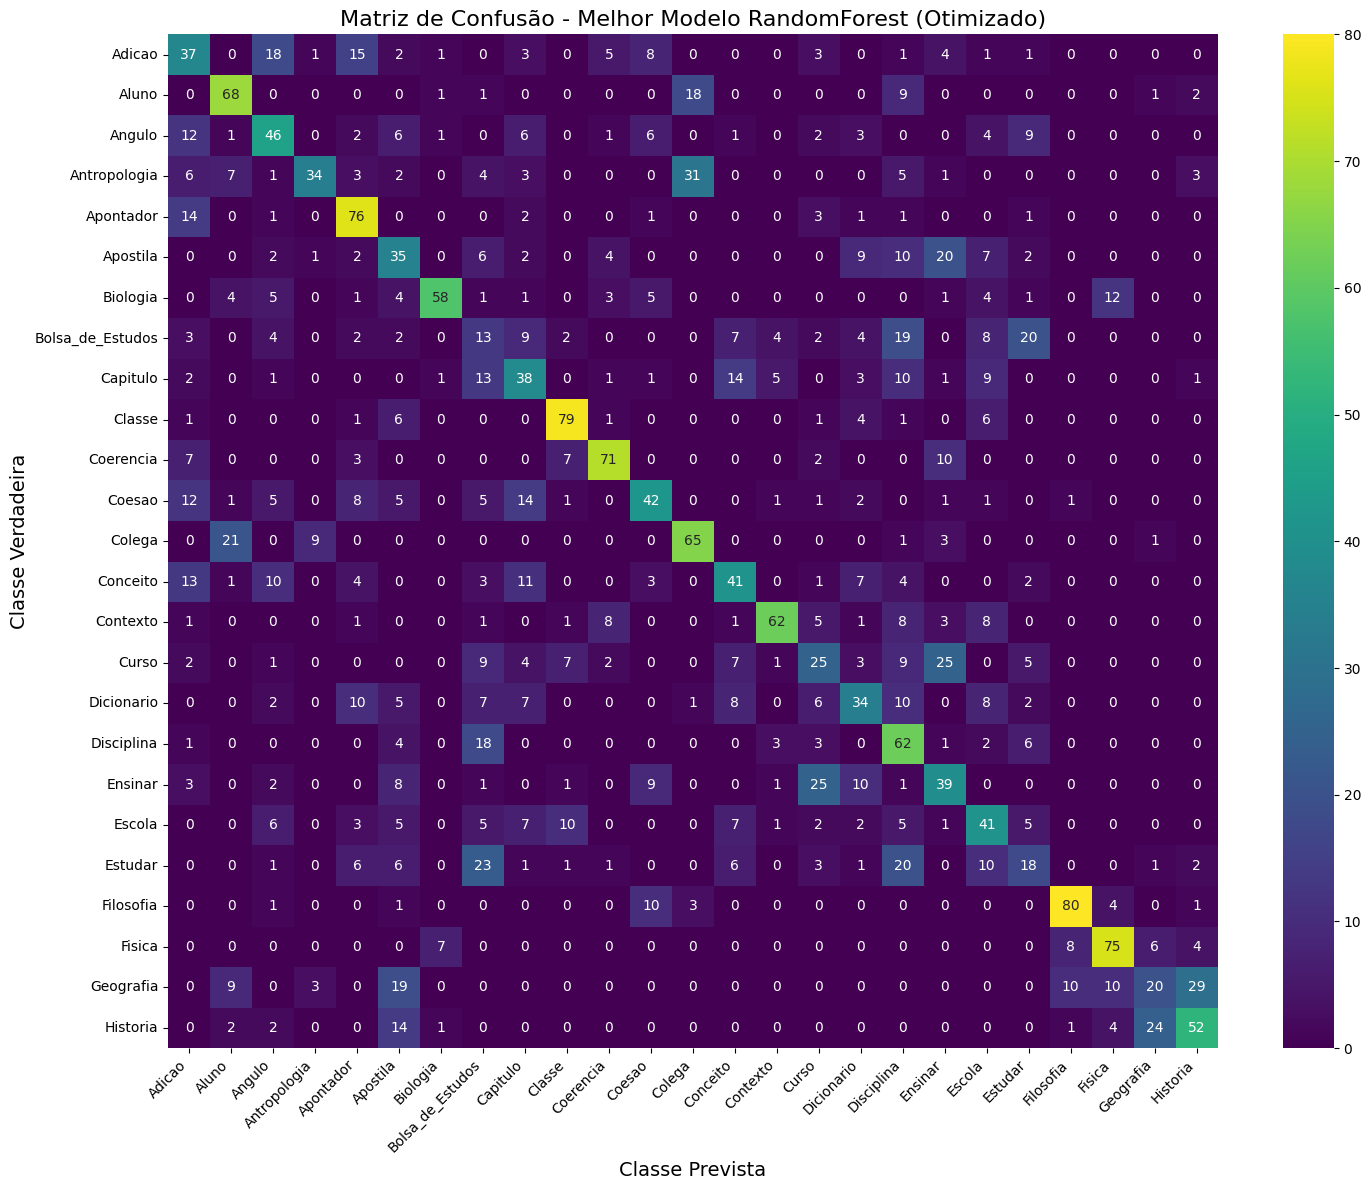

In [ ]:
%matplotlib inline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---")

# Usar cross_val_predict com o melhor modelo para obter as previsões
y_pred_final = cross_val_predict(best_rf_model, X, y, groups=grupos, cv=sgkf, n_jobs=-1)

# Calcular as métricas gerais
acc_final = accuracy_score(y, y_pred_final)
f1_final = f1_score(y, y_pred_final, average='weighted')

print(f"\nAcurácia Geral (com melhor modelo): {acc_final:.4f}")
print(f"F1-médio Geral (com melhor modelo): {f1_final:.4f}\n")

# Exibir o relatório de classificação detalhado
print("--- Relatório de Classificação Final ---")
nomes_classes = encoder.classes_
print(classification_report(y, y_pred_final, target_names=nomes_classes))

# Plotar a Matriz de Confusão
cm_final = confusion_matrix(y, y_pred_final)
plt.figure(figsize=(15, 12))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='viridis', # Cor diferente para o resultado final
            xticklabels=nomes_classes, yticklabels=nomes_classes)
plt.title('Matriz de Confusão - Melhor Modelo RandomForest (Otimizado)', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=14)
plt.xlabel('Classe Prevista', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Knn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defini a Estratégia de Validação Cruzada
n_splits = 5
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Defini a Grade de Parâmetros para o K-NN 
# Para o K-NN, os parâmetros mais importantes são o número de vizinhos e a métrica de distância.
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],      # Número de vizinhos a considerar
    'weights': ['uniform', 'distance'], # Como pesar a influência dos vizinhos
    'metric': ['euclidean', 'manhattan'] # Métrica para calcular a distância
}

# Configuração e Execução do GridSearchCV 
knn_model = KNeighborsClassifier(n_jobs=-1)

# Configurar o Grid Search para o K-NN
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=sgkf,
                               scoring='f1_weighted', n_jobs=-1, verbose=2)

print("Iniciando a busca pelos melhores hiperparâmetros para o K-NN...")
grid_search_knn.fit(X, y, groups=grupos)

print("\nBusca finalizada!")
print("---------------------------------------------")
print("Melhores parâmetros encontrados para o K-NN:")
print(grid_search_knn.best_params_)
print("\nMelhor pontuação (F1-score ponderado) na validação cruzada:")
print(f"{grid_search_knn.best_score_:.4f}")
print("---------------------------------------------")

# Guardar o melhor modelo K-NN encontrado
best_knn_model = grid_search_knn.best_estimator_

Iniciando a busca pelos melhores hiperparâmetros para o K-NN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Busca finalizada!
---------------------------------------------
Melhores parâmetros encontrados para o K-NN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Melhor pontuação (F1-score ponderado) na validação cruzada:
0.2513
---------------------------------------------


--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---

Acurácia Geral (com melhor modelo): 0.2585
F1-médio Geral (com melhor modelo): 0.2585

--- Relatório de Classificação Final ---
                  precision    recall  f1-score   support

          Adicao       0.12      0.23      0.16       100
           Aluno       0.51      0.37      0.43       100
          Angulo       0.12      0.19      0.15       100
    Antropologia       0.23      0.18      0.20       100
       Apontador       0.20      0.40      0.26       100
        Apostila       0.30      0.18      0.23       100
        Biologia       0.36      0.23      0.28       100
Bolsa_de_Estudos       0.06      0.04      0.05        99
        Capitulo       0.25      0.38      0.30       100
          Classe       0.76      0.47      0.58       100
       Coerencia       0.34      0.40      0.37       100
          Coesao       0.12      0.04      0.06       100
          Colega       0.23      0.21      0.2

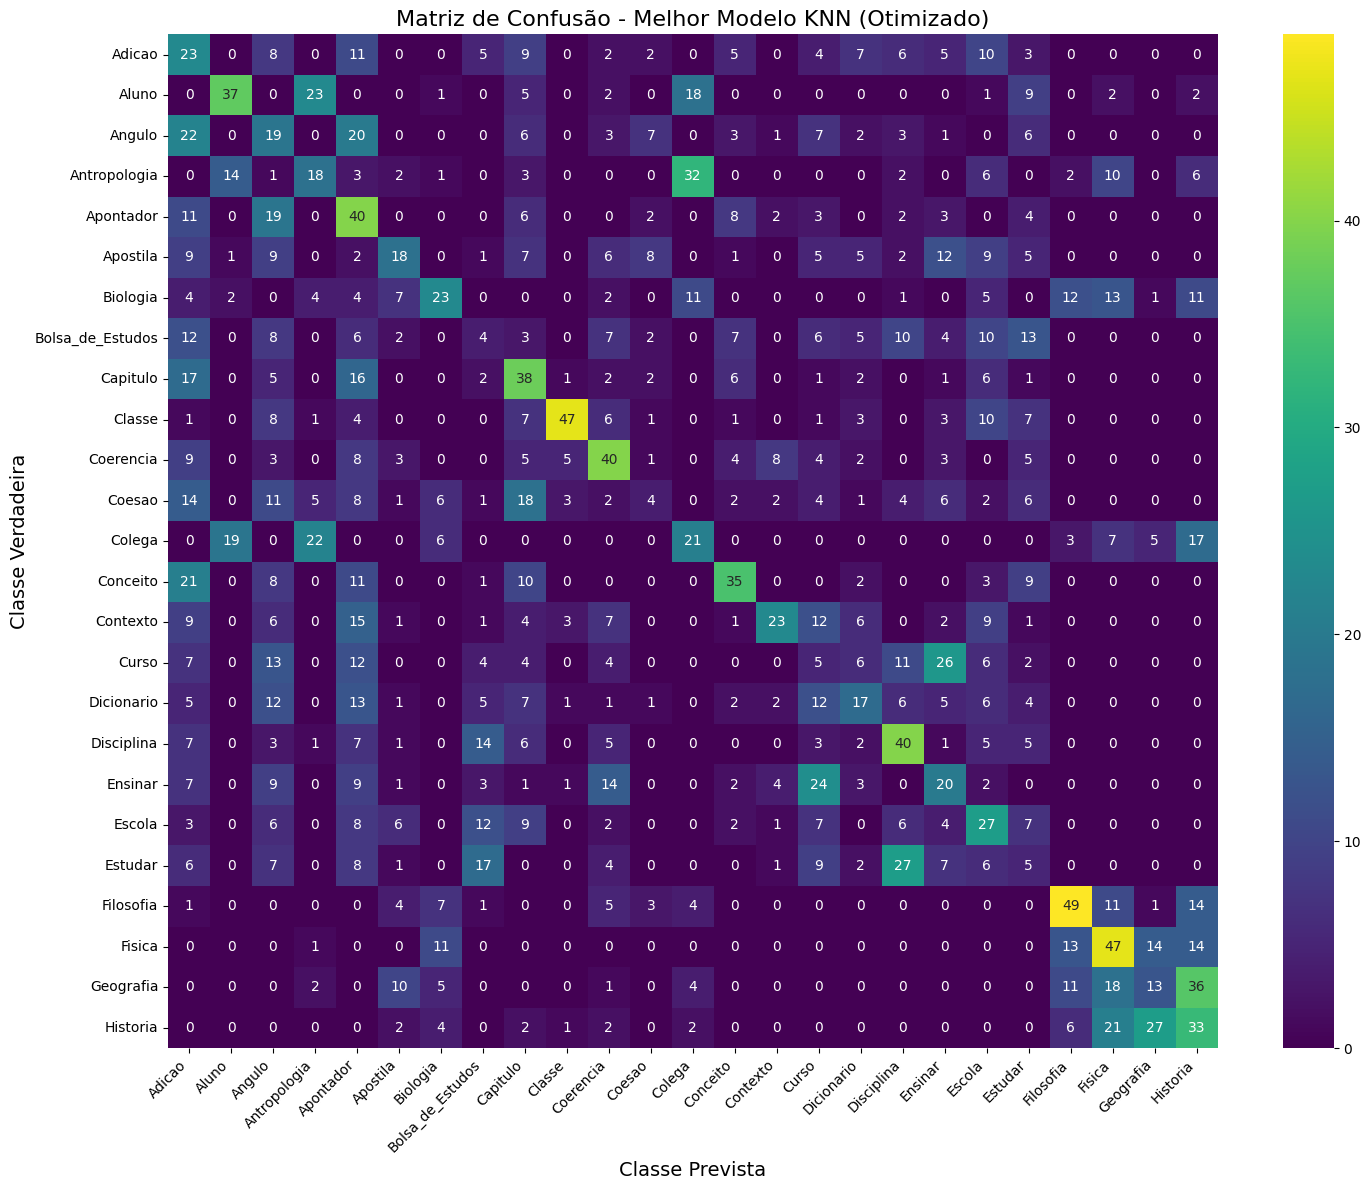

In [ ]:
%matplotlib inline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---")

# Usar cross_val_predict com o melhor modelo para obter as previsões
y_pred_final = cross_val_predict(best_knn_model, X, y, groups=grupos, cv=sgkf, n_jobs=-1)

# Calcular as métricas gerais
acc_final = accuracy_score(y, y_pred_final)
f1_final = f1_score(y, y_pred_final, average='weighted')

print(f"\nAcurácia Geral (com melhor modelo): {acc_final:.4f}")
print(f"F1-médio Geral (com melhor modelo): {f1_final:.4f}\n")

# Exibir o relatório de classificação detalhado
print("--- Relatório de Classificação Final ---")
nomes_classes = encoder.classes_
print(classification_report(y, y_pred_final, target_names=nomes_classes))

# Plotar a Matriz de Confusão
cm_final = confusion_matrix(y, y_pred_final)
plt.figure(figsize=(15, 12))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='viridis', # Cor diferente para o resultado final
            xticklabels=nomes_classes, yticklabels=nomes_classes)
plt.title('Matriz de Confusão - Melhor Modelo KNN (Otimizado)', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=14)
plt.xlabel('Classe Prevista', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# # Definição da Grade de Parâmetros  
# # param_grid = {
# #     'n_estimators': [100, 200],
# #     'max_depth': [10, 20, None],
# #     'min_samples_split': [2, 5],
# #     'min_samples_leaf': [1, 2]
# # }

## MLP - Multi-Layer Perceptron

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier



#  Definição da Estratégia de Validação Cruzada 
n_splits = 5
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  Definição da Grade de Parâmetros para o MLP 
param_grid_mlp = {
    # Testar duas arquiteturas: duas camadas com 50 neurônios ou uma com 100
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['relu', 'tanh'],   # Testar duas funções de ativação populares
    'alpha': [0.0001, 0.05],          # Testar duas forças de regularização
}

#  Configuração e Execução do GridSearchCV 
# max_iter aumentado para garantir a convergência
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Configuramos o Grid Search para o MLP
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=sgkf,
                               scoring='f1_weighted', n_jobs=-1, verbose=2)

print("Iniciando a busca pelos melhores hiperparâmetros para o MLP...")
grid_search_mlp.fit(X, y, groups=grupos)


print("\nBusca finalizada!")
print("---------------------------------------------")
print("Melhores parâmetros encontrados para o MLP:")
print(grid_search_mlp.best_params_)
print("\nMelhor pontuação (F1-score ponderado) na validação cruzada:")
print(f"{grid_search_mlp.best_score_:.4f}")
print("---------------------------------------------")

# Guardar o melhor modelo MLP encontrado
best_mlp_model = grid_search_mlp.best_estimator_

Iniciando a busca pelos melhores hiperparâmetros para o MLP...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Busca finalizada!
---------------------------------------------
Melhores parâmetros encontrados para o MLP:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}

Melhor pontuação (F1-score ponderado) na validação cruzada:
0.3977
---------------------------------------------


--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---

Acurácia Geral (com melhor modelo): 0.4154
F1-médio Geral (com melhor modelo): 0.4147

--- Relatório de Classificação Final ---
                  precision    recall  f1-score   support

          Adicao       0.27      0.36      0.31       100
           Aluno       0.84      0.68      0.75       100
          Angulo       0.31      0.38      0.34       100
    Antropologia       0.50      0.42      0.46       100
       Apontador       0.53      0.61      0.57       100
        Apostila       0.29      0.33      0.31       100
        Biologia       0.51      0.41      0.45       100
Bolsa_de_Estudos       0.21      0.21      0.21        99
        Capitulo       0.44      0.42      0.43       100
          Classe       0.73      0.62      0.67       100
       Coerencia       0.75      0.70      0.73       100
          Coesao       0.17      0.09      0.12       100
          Colega       0.50      0.60      0.5

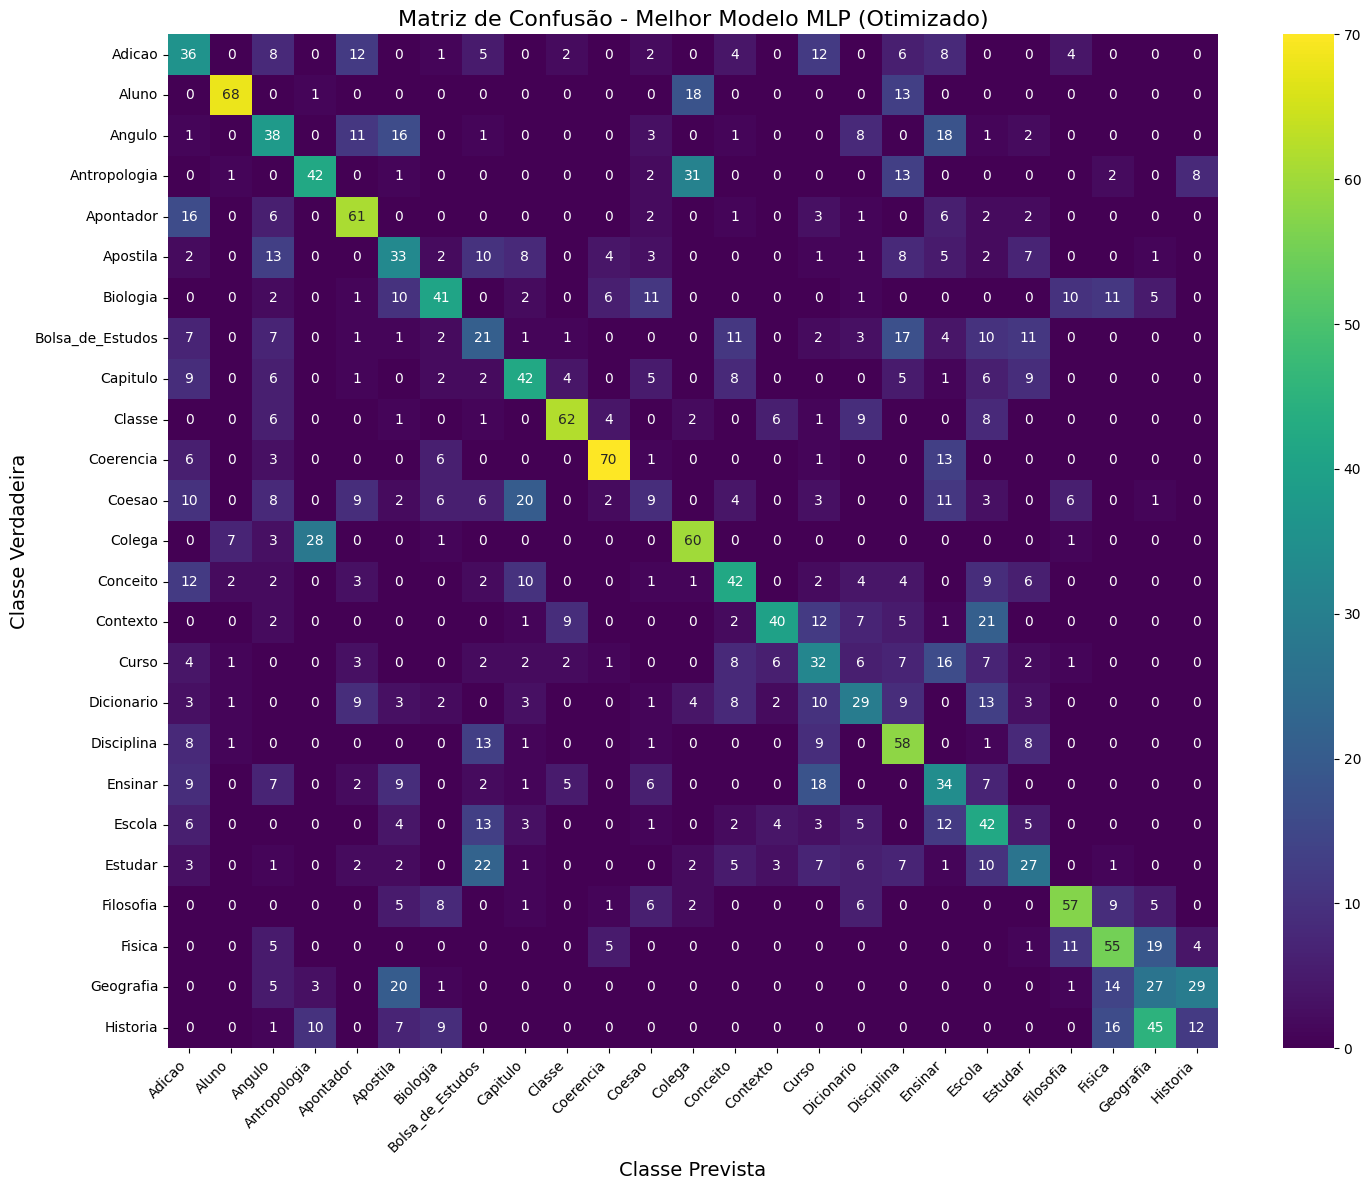

In [ ]:
%matplotlib inline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---")

# Usar cross_val_predict com o melhor modelo para obter as previsões
y_pred_final = cross_val_predict(best_mlp_model, X, y, groups=grupos, cv=sgkf, n_jobs=-1)

# Calcular as métricas gerais
acc_final = accuracy_score(y, y_pred_final)
f1_final = f1_score(y, y_pred_final, average='weighted')

print(f"\nAcurácia Geral (com melhor modelo): {acc_final:.4f}")
print(f"F1-médio Geral (com melhor modelo): {f1_final:.4f}\n")

# Exibir o relatório de classificação detalhado
print("--- Relatório de Classificação Final ---")
nomes_classes = encoder.classes_
print(classification_report(y, y_pred_final, target_names=nomes_classes))

# Plotar a Matriz de Confusão
cm_final = confusion_matrix(y, y_pred_final)
plt.figure(figsize=(15, 12))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='viridis', # Cor diferente para o resultado final
            xticklabels=nomes_classes, yticklabels=nomes_classes)
plt.title('Matriz de Confusão - Melhor Modelo MLP (Otimizado)', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=14)
plt.xlabel('Classe Prevista', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Comparando

In [ ]:
import pandas as pd

# Criar um dicionário com os resultados de cada modelo
resultados = {
    'Modelo': ['Random Forest', 'K-NN', 'MLP'],
    'Melhor F1-Score': [
        grid_search.best_score_,
        grid_search_knn.best_score_,
        grid_search_mlp.best_score_
    ],
    'Melhores Parâmetros': [
        str(grid_search.best_params_),
        str(grid_search_knn.best_params_),
        str(grid_search_mlp.best_params_)
    ]
}

# Converter o dicionáriao em um DataFrame do pandas para uma visualização clara
df_comparacao = pd.DataFrame(resultados)

# Ordenar o DataFrame pelo F1-score para ver facilmente qual foi o melhor
df_comparacao = df_comparacao.sort_values(by='Melhor F1-Score', ascending=False)

print("--- Tabela Comparativa dos Modelos Otimizados ---")
display(df_comparacao)

--- Tabela Comparativa dos Modelos Otimizados ---


Modelo  Melhor F1-Score  \
0  Random Forest         0.464394   
2            MLP         0.397702   
1           K-NN         0.251283   

                                 Melhores Parâmetros  
0  {'max_depth': 30, 'min_samples_split': 5, 'n_e...  
2  {'activation': 'relu', 'alpha': 0.0001, 'hidde...  
1  {'metric': 'manhattan', 'n_neighbors': 3, 'wei...

# testando modelos sem o Z

In [40]:
df_sem_Z = pd.read_csv('keyframes_brutos.csv', index_col=0)

In [41]:
sinais = pd.read_csv('sinais2.csv')

In [42]:
import pandas as pd
import numpy as np

def extrair_features_temporais(video_df, num_partes=10):
    """
    Processa um vídeo, o divide em partes e extrai média, desvio padrão e variância de cada parte.
    """
    # 1. Pivotar o vídeo para o formato [frame, features]
    pivot_video = video_df.pivot_table(
        index='frame_num', 
        columns='keypoint_id', 
        values=['x', 'y', 'visibility']
    )
    pivot_video.columns = [f'{col[1]}_{col[0]}' for col in pivot_video.columns]
    pivot_video.sort_index(inplace=True) # Garante a ordem dos frames

    # 2. Dividir os frames do vídeo em N partes iguais
    partes = np.array_split(pivot_video, num_partes)
    
    features_finais_video = []
    
    # 3. Calcular estatísticas para cada parte
    for i, parte in enumerate(partes):
        if parte.empty:
            continue # Pula partes vazias se o vídeo for muito curto
            
        # Calcular média, desvio padrão e variância
        mean_features = parte.mean().add_suffix(f'_p{i}_mean')
        std_features = parte.std().add_suffix(f'_p{i}_std')
        var_features = parte.var().add_suffix(f'_p{i}_var')
        
        features_finais_video.extend([mean_features, std_features, var_features])
    
    # 4. Concatenar todas as features de todas as partes em uma única linha (vetor)
    if not features_finais_video:
        return None 
    return pd.concat(features_finais_video)

# Aplicar a função a todos os vídeos 
print("Iniciando extração de características temporais...")

# Agrupar por vídeo e aplicar a função de extração
# .dropna() remove vídeos que eram muito curtos para gerar features
df_sem_Z = df_sem_Z.groupby('file_name').apply(lambda x: extrair_features_temporais(x)).dropna()

# Preenche NaNs que podem surgir do std/var de partes com um único frame
df_sem_Z.fillna(0, inplace=True)

print("Extração concluída!")
print(f"Shape do novo DataFrame de características: {df_sem_Z.shape}")
print(df_sem_Z.head())

Iniciando extração de características temporais...


C:\Users\augusto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\augusto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\augusto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds

Extração concluída!
Shape do novo DataFrame de características: (2499, 990)
                   11_visibility_p0_mean  12_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                     1.0                    1.0   
Adicao_AP_10.json                    1.0                    1.0   
Adicao_AP_2.json                     1.0                    1.0   
Adicao_AP_3.json                     1.0                    1.0   
Adicao_AP_4.json                     1.0                    1.0   

                   13_visibility_p0_mean  14_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                    1.00                  1.000   
Adicao_AP_10.json                   1.00                  1.000   
Adicao_AP_2.json                    1.00                  1.000   
Adicao_AP_3.json                    0.99                  0.994   
Adicao_AP_4.json                    1.00            

In [44]:

# Adiciona a coluna sinal (pega um valor único de cada vídeo)
df_sinais = df_keyframes.groupby('file_name')['sinal'].first()

# Junta no DataFrame final
df_sem_Z = df_sem_Z.join(df_sinais)

print(df_sem_Z.head())

                   11_visibility_p0_mean  12_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                     1.0                    1.0   
Adicao_AP_10.json                    1.0                    1.0   
Adicao_AP_2.json                     1.0                    1.0   
Adicao_AP_3.json                     1.0                    1.0   
Adicao_AP_4.json                     1.0                    1.0   

                   13_visibility_p0_mean  14_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                    1.00                  1.000   
Adicao_AP_10.json                   1.00                  1.000   
Adicao_AP_2.json                    1.00                  1.000   
Adicao_AP_3.json                    0.99                  0.994   
Adicao_AP_4.json                    1.00                  1.000   

                   15_visibility_p0_mean  16_visibility_p0_m

In [45]:
# salvar o DataFrame em um arquivo CSV
df_sem_Z.to_csv('features_temporais_sem_Z.csv', index=True)

In [46]:
df_sem_Z = pd.read_csv('features_temporais_sem_Z.csv', index_col=0)

## dividindo x e Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


print("--- Separando Características (X), Rótulo (y) e Grupos ---")

# Para garantir a coluna 'interprete' para os grupos, vou pegar em 'sinais' 

if 'file_name' not in df_sem_Z.columns:
    df_sem_Z.reset_index(inplace=True)

info_df = sinais[['file_name', 'sinal', 'interprete']].drop_duplicates()
df_final = df_sem_Z.merge(info_df, on='file_name', how='left')

# Criar a variável de rótulos (y) a partir da coluna 'sinal' e codificá-la
encoder = LabelEncoder()
y = encoder.fit_transform(df_final['sinal'])
labels = encoder.classes_ # Guardar os nomes das classes para os gráficos

# Definir os grupos
grupos = df_final['interprete']

# Definir o X (características) removendo todas as colunas de metadados
colunas_para_remover = ['file_name', 'sinal', 'interprete']
X = df_final.drop(columns=colunas_para_remover)

print("Separação concluída!")
print(f"Shape de X (características): {X.shape}")
print(f"Shape de y (rótulos): {y.shape}")
print(f"Shape de groups: {grupos.shape}")


--- Separando Características (X), Rótulo (y) e Grupos ---
Separação concluída!
Shape de X (características): (2499, 990)
Shape de y (rótulos): (2499,)
Shape de groups: (2499,)


## Random Forest 

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#  Definição da Estratégia de Validação Cruzada 
n_splits = 5
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Definição da Grade de Parâmetros 
# Usando a grade que você forneceu:
param_grid = {
    'n_estimators': [100, 200],      #  2 opções para o número de árvores
    'max_depth': [10, 30],           #  2 opções para a profundidade
    'min_samples_split': [2, 5]      #  2 opções para divisão
}

print("Grade de parâmetros a ser testada:")
print(param_grid)

#  Configuração e Execução do GridSearchCV ---
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=sgkf, 
                           scoring='f1_weighted', n_jobs=-1, verbose=2)

print("\nIniciando a busca pelos melhores hiperparâmetros...")
grid_search.fit(X, y, groups=grupos)

print("\nBusca finalizada!")
print("---------------------------------------------")
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("\nMelhor pontuação (F1-score ponderado) na validação cruzada:")
print(f"{grid_search.best_score_:.4f}")
print("---------------------------------------------")

# Guardar o melhor modelo encontrado
best_rf_model = grid_search.best_estimator_

Grade de parâmetros a ser testada:
{'n_estimators': [100, 200], 'max_depth': [10, 30], 'min_samples_split': [2, 5]}

Iniciando a busca pelos melhores hiperparâmetros...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Busca finalizada!
---------------------------------------------
Melhores parâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Melhor pontuação (F1-score ponderado) na validação cruzada:
0.4781
---------------------------------------------


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt



print("--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---")

# Usar cross_val_predict com o melhor modelo para obter as previsões
y_pred_final = cross_val_predict(best_rf_model, X, y, groups=grupos, cv=sgkf, n_jobs=-1)

# Calcular as métricas gerais
acc_final = accuracy_score(y, y_pred_final)
f1_final = f1_score(y, y_pred_final, average='weighted')

print(f"\nAcurácia Geral (com melhor modelo): {acc_final:.4f}")
print(f"F1-médio Geral (com melhor modelo): {f1_final:.4f}\n")

# Exibir o relatório de classificação detalhado
print("--- Relatório de Classificação Final ---")
nomes_classes = encoder.classes_
print(classification_report(y, y_pred_final, target_names=nomes_classes))

#  Plotar a Matriz de Confusão
cm_final = confusion_matrix(y, y_pred_final)
plt.figure(figsize=(15, 12))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='viridis', # Cor diferente para o resultado final
            xticklabels=nomes_classes, yticklabels=nomes_classes)
plt.title('Matriz de Confusão - Melhor Modelo RandomForest (Otimizado)', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=14)
plt.xlabel('Classe Prevista', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

--- Avaliação Final do Melhor Modelo Encontrado pelo GridSearchCV ---

Acurácia Geral (com melhor modelo): 0.4930
F1-médio Geral (com melhor modelo): 0.4948

--- Relatório de Classificação Final ---
                  precision    recall  f1-score   support

          Adicao       0.33      0.35      0.34       100
           Aluno       0.71      0.65      0.68       100
          Angulo       0.38      0.48      0.43       100
    Antropologia       0.86      0.42      0.56       100
       Apontador       0.59      0.73      0.65       100
        Apostila       0.38      0.47      0.42       100
        Biologia       0.84      0.66      0.74       100
Bolsa_de_Estudos       0.15      0.14      0.14        99
        Capitulo       0.42      0.42      0.42       100
          Classe       0.80      0.80      0.80       100
       Coerencia       0.80      0.73      0.76       100
          Coesao       0.43      0.37      0.40       100
          Colega       0.55      0.71      0.6

C:\Users\augusto\AppData\Local\Temp\ipykernel_17648\1384204543.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


## knn


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


#  Definição da Estratégia de Validação Cruzada 
n_splits = 5
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

# --- 2. Definição da Grade de Parâmetros para o K-NN ---
# Os parâmetros aqui são específicos para o K-NN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],      # Número de vizinhos a considerar
    'weights': ['uniform', 'distance'], # Como pesar a influência dos vizinhos
    'metric': ['euclidean', 'manhattan'] # Métrica para calcular a distância
}

# Configuração e Execução do GridSearchCV 
knn_model = KNeighborsClassifier(n_jobs=-1)

# o Grid Search para o K-NN
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=sgkf,
                               scoring='f1_weighted', n_jobs=-1, verbose=2)

print("Iniciando a busca pelos melhores hiperparâmetros para o K-NN...")
grid_search_knn.fit(X, y, groups=grupos)

print("\nBusca finalizada!")
print("---------------------------------------------")
print("Melhores parâmetros encontrados para o K-NN:")
print(grid_search_knn.best_params_)
print("\nMelhor pontuação (F1-score ponderado) na validação cruzada:")
print(f"{grid_search_knn.best_score_:.4f}")
print("---------------------------------------------")

# Guardar o melhor modelo K-NN encontrado
best_knn_model = grid_search_knn.best_estimator_

Iniciando a busca pelos melhores hiperparâmetros para o K-NN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Busca finalizada!
---------------------------------------------
Melhores parâmetros encontrados para o K-NN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Melhor pontuação (F1-score ponderado) na validação cruzada:
0.3588
---------------------------------------------


## MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definição da Estratégia de Validação Cruzada 
n_splits = 5
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Definição da Grade de Parâmetros para o MLP 
param_grid_mlp = {
    # Testar duas arquiteturas: duas camadas com 50 neurônios ou uma com 100
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['relu', 'tanh'],   # Testar duas funções de ativação populares
    'alpha': [0.0001, 0.05],          # Testar duas forças de regularização
}

# Configuração e Execução do GridSearchCV 
# max_iter aumentado para garantir a convergência
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Configuramos o Grid Search para o MLP
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=sgkf,
                               scoring='f1_weighted', n_jobs=-1, verbose=2)

print("Iniciando a busca pelos melhores hiperparâmetros para o MLP...")
grid_search_mlp.fit(X, y, groups=grupos)

print("\nBusca finalizada!")
print("---------------------------------------------")
print("Melhores parâmetros encontrados para o MLP:")
print(grid_search_mlp.best_params_)
print("\nMelhor pontuação (F1-score ponderado) na validação cruzada:")
print(f"{grid_search_mlp.best_score_:.4f}")
print("---------------------------------------------")

# Guardar o melhor modelo MLP encontrado
best_mlp_model = grid_search_mlp.best_estimator_

Iniciando a busca pelos melhores hiperparâmetros para o MLP...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Busca finalizada!
---------------------------------------------
Melhores parâmetros encontrados para o MLP:
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,)}

Melhor pontuação (F1-score ponderado) na validação cruzada:
0.5047
---------------------------------------------


In [ ]:
import pandas as pd

# 1. Criar um dicionário com os resultados de cada modelo
resultados = {
    'Modelo': ['Random Forest', 'K-NN', 'MLP'],
    'Melhor F1-Score': [
        grid_search.best_score_,
        grid_search_knn.best_score_,
        grid_search_mlp.best_score_
    ],
    'Melhores Parâmetros': [
        str(grid_search.best_params_),
        str(grid_search_knn.best_params_),
        str(grid_search_mlp.best_params_)
    ]
}

# Converter o dicionário em um DataFrame do pandas para uma visualização clara
df_comparacao = pd.DataFrame(resultados)

#  Ordenar o DataFrame pelo F1-score para ver facilmente qual foi o melhor
df_comparacao = df_comparacao.sort_values(by='Melhor F1-Score', ascending=False)

print("--- Tabela Comparativa dos Modelos Otimizados ---")
display(df_comparacao)

--- Tabela Comparativa dos Modelos Otimizados ---


Modelo  Melhor F1-Score  \
2            MLP         0.504731   
0  Random Forest         0.464394   
1           K-NN         0.358777   

                                 Melhores Parâmetros  
2  {'activation': 'relu', 'alpha': 0.05, 'hidden_...  
0  {'max_depth': 30, 'min_samples_split': 5, 'n_e...  
1  {'metric': 'manhattan', 'n_neighbors': 3, 'wei...

# Parte 2


In [ ]:
df_features = pd.read_csv('features_temporais.csv', index_col=0)
sinais = pd.read_csv('sinais2.csv')

In [58]:
df_features.head()

11_visibility_p0_mean  12_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                     1.0                    1.0   
Adicao_AP_10.json                    1.0                    1.0   
Adicao_AP_2.json                     1.0                    1.0   
Adicao_AP_3.json                     1.0                    1.0   
Adicao_AP_4.json                     1.0                    1.0   

                   13_visibility_p0_mean  14_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                    1.00                  1.000   
Adicao_AP_10.json                   1.00                  1.000   
Adicao_AP_2.json                    1.00                  1.000   
Adicao_AP_3.json                    0.99                  0.994   
Adicao_AP_4.json                    1.00                  1.000   

                   15_visibility_p0_mean  16_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                0.971333               0.976000   
Adicao_AP_10.json               0.975000               0.980000   
Adicao_AP_2.json                0.977857               0.970000   
Adicao_AP_3.json                0.965333               0.957333   
Adicao_AP_4.json                0.980000               0.973571   

                   17_visibility_p0_mean  18_visibility_p0_mean  \
file_name                                                         
Adicao_AP_1.json                0.916000               0.932000   
Adicao_AP_10.json               0.926429               0.936429   
Adicao_AP_2.json                0.930000               0.918571   
Adicao_AP_3.json                0.906667               0.895333   
Adicao_AP_4.json                0.940000               0.932857   

                   19_visibility_p0_mean  20_visibility_p0_mean  ...  \
file_name                                                        ...   
Adicao_AP_1.json                0.922000               0.939333  ...   
Adicao_AP_10.json               0.931429               0.942143  ...   
Adicao_AP_2.json                0.933571               0.923571  ...   
Adicao_AP_3.json                0.915333               0.905333  ...   
Adicao_AP_4.json                0.942143               0.941429  ...   

                   13_z_p9_var  14_z_p9_var  15_z_p9_var  16_z_p9_var  \
file_name                                                               
Adicao_AP_1.json      0.000213     0.000288     0.000767     0.000726   
Adicao_AP_10.json     0.000106     0.000123     0.000126     0.000792   
Adicao_AP_2.json      0.000276     0.000991     0.001841     0.003360   
Adicao_AP_3.json      0.000319     0.000253     0.000484     0.000702   
Adicao_AP_4.json      0.000677     0.000767     0.002244     0.002664   

                   17_z_p9_var  18_z_p9_var  19_z_p9_var  20_z_p9_var  \
file_name                                                               
Adicao_AP_1.json      0.000890     0.000760     0.000873     0.000715   
Adicao_AP_10.json     0.000206     0.000931     0.000208     0.000926   
Adicao_AP_2.json      0.002076     0.004341     0.002324     0.004456   
Adicao_AP_3.json      0.000526     0.000853     0.000594     0.000846   
Adicao_AP_4.json      0.002977     0.003006     0.002964     0.003573   

                   21_z_p9_var   sinal  
file_name                               
Adicao_AP_1.json      0.000702  Adicao  
Adicao_AP_10.json     0.000131  Adicao  
Adicao_AP_2.json      0.001892  Adicao  
Adicao_AP_3.json      0.000407  Adicao  
Adicao_AP_4.json      0.002440  Adicao  

[5 rows x 1321 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


print("--- Separando Características (X), Rótulo (y) e Grupos ---")

# Para garantir que temos a coluna 'interprete' para os grupos, 
# vamos buscá-la no DataFrame 'sinais' original.
# Primeiro, garantimos que 'file_name' é uma coluna em df_features
if 'file_name' not in df_features.columns:
    df_features.reset_index(inplace=True)

info_df = sinais[['file_name', 'interprete']].drop_duplicates()
df_final = df_features.merge(info_df, on='file_name', how='left')


# Criar a variável de rótulos (y) a partir da coluna 'sinal' e codificá-la
encoder = LabelEncoder()
y = encoder.fit_transform(df_final['sinal'])
labels = encoder.classes_ # Guardar os nomes das classes para os gráficos

# Definir os grupos
groups = df_final['interprete']

# Definir o X (características) removendo todas as colunas de metadados
colunas_para_remover = ['file_name', 'sinal', 'interprete']
X = df_final.drop(columns=colunas_para_remover)

print("Separação concluída!")
print(f"Shape de X (características): {X.shape}")
print(f"Shape de y (rótulos): {y.shape}")
print(f"Shape de groups: {groups.shape}")

--- Separando Características (X), Rótulo (y) e Grupos ---
Separação concluída!
Shape de X (características): (2499, 1320)
Shape de y (rótulos): (2499,)
Shape de groups: (2499,)


## K-means

--- Preparando os Dados para Clusterização ---
Calculando a inércia para diferentes valores de K...


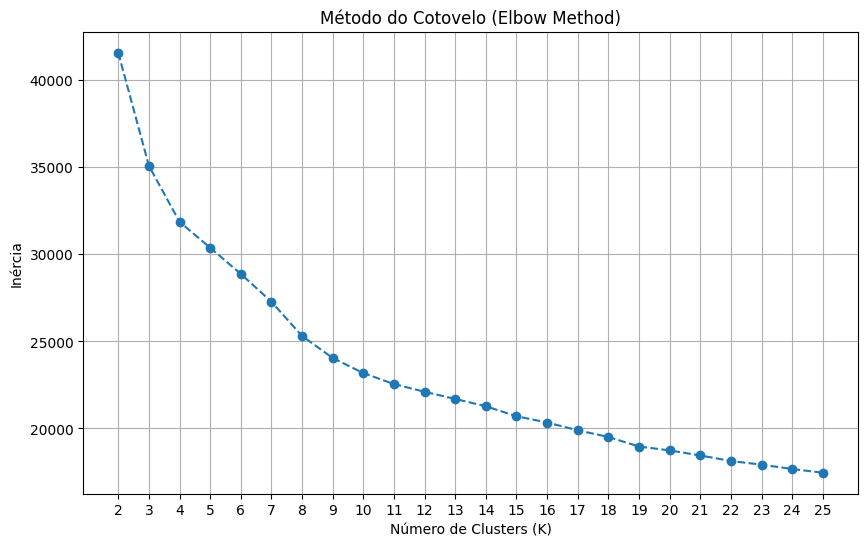

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


print("--- Preparando os Dados para Clusterização ---")
# Garantir que estamos usando apenas os dados numéricos
X_cluster = X.select_dtypes(include=['float64', 'int64'])


# Lista para armazenar os valores da inércia para cada valor de K
inercia = []
# Faixa de valores de K que vamos testar
k_range = range(2, 26) # Testaremos de 2 a 26 clusters

print("Calculando a inércia para diferentes valores de K...")
for k in k_range:
    # Cria e treina o modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster)
    
    # Armazena a inércia do modelo treinado
    inercia.append(kmeans.inertia_)

# Plotar o Gráfico do Cotovelo ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inercia, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Definir o número de clusters que você escolheu
k_ideal = 18

print(f"Aplicando o K-Means com k={k_ideal}...")

# Inicializar e treinar o modelo K-Means
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42, n_init='auto')
kmeans_final.fit(X_cluster)

# Adicionar os rótulos dos clusters de volta ao DataFrame principal
# Isso nos permite ver a qual cluster cada vídeo pertence
df_features['kmeans_cluster'] = kmeans_final.labels_

print("\nClusterização com K-Means concluída!")
print("Amostra do DataFrame com a nova coluna de cluster:")

print(df_features[['file_name', 'kmeans_cluster']].head())

# Vamos ver quantos vídeos foram atribuídos a cada cluster
print("\nDistribuição dos vídeos por cluster:")
print(df_features['kmeans_cluster'].value_counts().sort_index())

Aplicando o K-Means com k=18...

Clusterização com K-Means concluída!
Amostra do DataFrame com a nova coluna de cluster:
           file_name  kmeans_cluster
0   Adicao_AP_1.json               4
1  Adicao_AP_10.json               4
2   Adicao_AP_2.json               4
3   Adicao_AP_3.json               4
4   Adicao_AP_4.json               4

Distribuição dos vídeos por cluster:
kmeans_cluster
0     136
1     159
2     177
3     161
4     125
5     138
6      70
7     166
8      93
9     311
10    103
11     26
12    134
13     75
14    121
15    222
16    126
17    156
Name: count, dtype: int64


Para k=18, o Score de Silhueta médio é: 0.1441

Reduzindo a dimensionalidade com PCA para visualização...
Gerando o gráfico dos clusters...


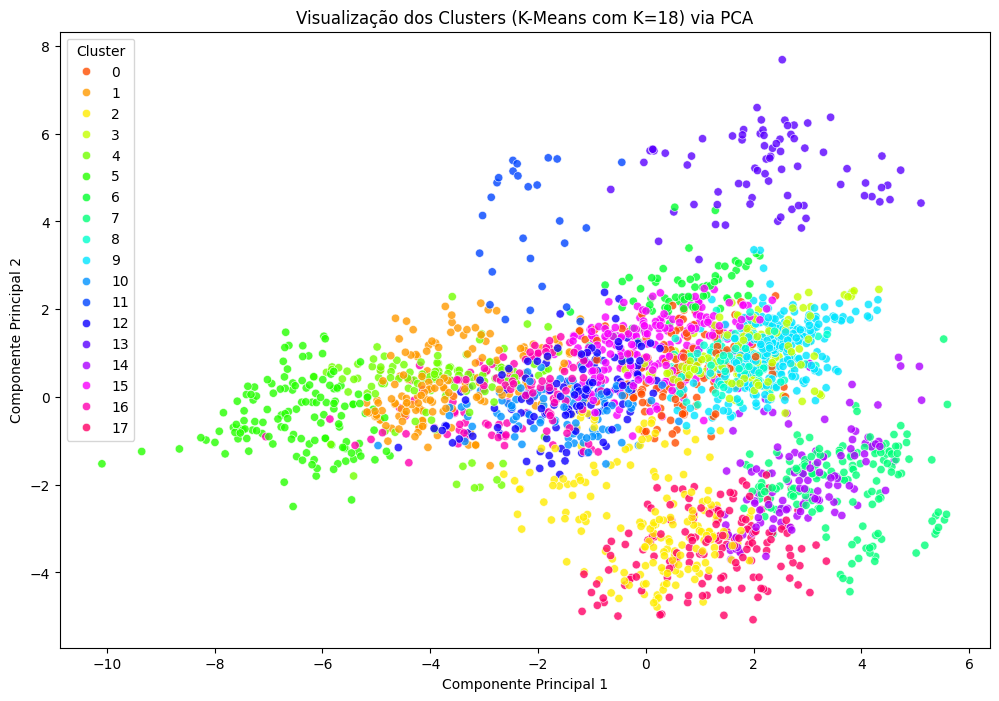

In [78]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Calcular o Score de Silhueta ---
# A métrica compara a distância média intra-cluster com a distância média inter-cluster.
# Quanto mais próximo de 1, melhor.
silhouette_avg = silhouette_score(X_cluster, df_features['kmeans_cluster'])

print(f"Para k=18, o Score de Silhueta médio é: {silhouette_avg:.4f}")


# --- 2. Visualizar os Clusters com PCA ---
print("\nReduzindo a dimensionalidade com PCA para visualização...")
# Reduzir os dados para 2 componentes principais
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

# Criar um novo DataFrame para facilitar a plotagem
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Cluster'] = df_features['kmeans_cluster']


# --- 3. Plotar o Gráfico de Dispersão ---
print("Gerando o gráfico dos clusters...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Componente Principal 1", y="Componente Principal 2",
    hue="Cluster",
    palette=sns.color_palette("hsv", n_colors=18), # Paleta de cores para os 18 clusters
    data=df_pca,
    legend="full",
    alpha=0.8
)
plt.title('Visualização dos Clusters (K-Means com K=18) via PCA')
plt.show()

## Hieraquico 

### Linkege Ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Iniciando o Clustering Hierárquico (linkage='ward')...")

# Definimos o modelo com os parâmetros solicitados
hierarchical_ward = AgglomerativeClustering(n_clusters=18, linkage='ward')

# O método .fit_predict treina o modelo e retorna os rótulos dos clusters em um único passo
labels_ward = hierarchical_ward.fit_predict(X_cluster)

# Avaliar os Resultados 
# Calcular o Score de Silhueta
silhouette_ward = silhouette_score(X_cluster, labels_ward)
print(f"\nScore de Silhueta para o método 'ward': {silhouette_ward:.4f}")
# Calcular Davies-Bouldin Index e Calinski-Harabasz Index
db_index = davies_bouldin_score(X_cluster, labels_ward)
print("Davies-Bouldin Index:", db_index)
# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_cluster, labels_ward)
print("Calinski-Harabasz Index:", ch_index)

# Adicionar os rótulos ao DataFrame principal para análise
df_features['hierarchical_ward_cluster'] = labels_ward

# Analisar a Distribuição 
print("\nDistribuição dos vídeos por cluster (Hierárquico - Ward):")
print(df_features['hierarchical_ward_cluster'].value_counts().sort_index())

Iniciando o Clustering Hierárquico (linkage='ward')...

Score de Silhueta para o método 'ward': 0.1311
Davies-Bouldin Index: 1.8450133448456083
Calinski-Harabasz Index: 245.13820028657557

Distribuição dos vídeos por cluster (Hierárquico - Ward):
hierarchical_ward_cluster
0     249
1     194
2     243
3     395
4     117
5     139
6     219
7      30
8     182
9      70
10     60
11    120
12    168
13     81
14     69
15     30
16     82
17     51
Name: count, dtype: int64


### Linkage average 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Iniciando o Clustering Hierárquico (linkage='complete')...")

# Definimos o modelo com os parâmetros solicitados
hierarchical_complete = AgglomerativeClustering(n_clusters=18, linkage='average')

# O método .fit_predict treina o modelo e retorna os rótulos dos clusters
labels_average = hierarchical_complete.fit_predict(X_cluster)

# Avaliar os Resultados 
# Calcular o Score de Silhueta
silhouette_complete = silhouette_score(X_cluster, labels_average)
print(f"\nScore de Silhueta para o método 'complete': {silhouette_complete:.4f}")
# Calcular Davies-Bouldin Index e Calinski-Harabasz Index
db_index = davies_bouldin_score(X_cluster, labels_average)
print("Davies-Bouldin Index:", db_index)
# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_cluster, labels_average)
print("Calinski-Harabasz Index:", ch_index)

# Adicionar os rótulos ao DataFrame principal para análise
df_features['hierarchical_complete_cluster'] = labels_average

# Analisar a Distribuição ---
print("\nDistribuição dos vídeos por cluster (Hierárquico - Complete):")
print(df_features['hierarchical_complete_cluster'].value_counts().sort_index())

Iniciando o Clustering Hierárquico (linkage='complete')...

Score de Silhueta para o método 'complete': 0.1217
Davies-Bouldin Index: 1.1648375152969423
Calinski-Harabasz Index: 145.31215970840097

Distribuição dos vídeos por cluster (Hierárquico - Complete):
hierarchical_complete_cluster
0      79
1     532
2      15
3     895
4      71
5       4
6     537
7       6
8      20
9       1
10      3
11      5
12      1
13      9
14    309
15      2
16      9
17      1
Name: count, dtype: int64


## Avaliação dos clusters

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Dicionário para mapear os nomes dos modelos às suas colunas de rótulos
model_labels = {
    'K-Means (K=18)': 'kmeans_cluster',
    'MeanShift': 'meanshift_cluster',
    'Hierárquico (Ward)': 'hierarchical_ward_cluster',
    'Hierárquico (average)': 'hierarchical_complete_cluster'
}

# Lista para armazenar os resultados
resultados = []

print("Calculando métricas de avaliação para cada modelo...")

# Loop para calcular as métricas para cada modelo
for model_name, label_column in model_labels.items():
    if label_column in df_features.columns:
        labels = df_features[label_column]
        
        # As métricas só podem ser calculadas se houver mais de 1 cluster
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_cluster, labels)
            davies_bouldin = davies_bouldin_score(X_cluster, labels)
            calinski_harabasz = calinski_harabasz_score(X_cluster, labels)
            
            resultados.append({
                'Modelo': model_name,
                'Score de Silhueta (↑)': silhouette,
                'Davies-Bouldin (↓)': davies_bouldin,
                'Calinski-Harabasz (↑)': calinski_harabasz
            })
        else:
            print(f"Aviso: O modelo '{model_name}' encontrou apenas 1 cluster. As métricas não podem ser calculadas.")
    else:
        print(f"Aviso: A coluna de cluster '{label_column}' não foi encontrada. Pulando o modelo '{model_name}'.")

# Criar um DataFrame com os resultados
df_comparacao = pd.DataFrame(resultados)
# Ordenar pelo Score de Silhueta para ver o melhor
df_comparacao = df_comparacao.sort_values(by='Score de Silhueta (↑)', ascending=False)

print("\n--- Tabela Comparativa dos Modelos de Clusterização ---")
# As setas (↑, ↓) indicam se valores maiores ou menores são melhores para cada métrica
display(df_comparacao.round(4))

Calculando métricas de avaliação para cada modelo...
Aviso: O modelo 'MeanShift' encontrou apenas 1 cluster. As métricas não podem ser calculadas.

--- Tabela Comparativa dos Modelos de Clusterização ---


Modelo  Score de Silhueta (↑)  Davies-Bouldin (↓)  \
0         K-Means (K=18)                 0.1441              1.8412   
1     Hierárquico (Ward)                 0.1311              1.8450   
2  Hierárquico (average)                 0.1217              1.1648   

   Calinski-Harabasz (↑)  
0               265.9080  
1               245.1382  
2               145.3122

## Testando sem o Z 

In [47]:
df_sem_Z = pd.read_csv('features_temporais_sem_Z.csv', index_col=0)

In [48]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


print("--- Separando Características (X), Rótulo (y) e Grupos ---")

if 'file_name' not in df_sem_Z.columns:
    df_sem_Z.reset_index(inplace=True)

info_df = sinais[['file_name', 'interprete']].drop_duplicates()
df_final = df_sem_Z.merge(info_df, on='file_name', how='left')


# Criar a variável de rótulos (y) a partir da coluna 'sinal' e codificá-la
encoder = LabelEncoder()
y = encoder.fit_transform(df_final['sinal'])
labels = encoder.classes_ # Guardar os nomes das classes para os gráficos

# Definir os grupos
groups = df_final['interprete']

# Definir o X (características) removendo todas as colunas de metadados
colunas_para_remover = ['file_name', 'sinal', 'interprete']
X = df_final.drop(columns=colunas_para_remover)

print("Separação concluída!")
print(f"Shape de X (características): {X.shape}")
print(f"Shape de y (rótulos): {y.shape}")
print(f"Shape de groups: {groups.shape}")

--- Separando Características (X), Rótulo (y) e Grupos ---
Separação concluída!
Shape de X (características): (2499, 990)
Shape de y (rótulos): (2499,)
Shape de groups: (2499,)


### K-means

--- Preparando os Dados para Clusterização ---
Calculando a inércia para diferentes valores de K...


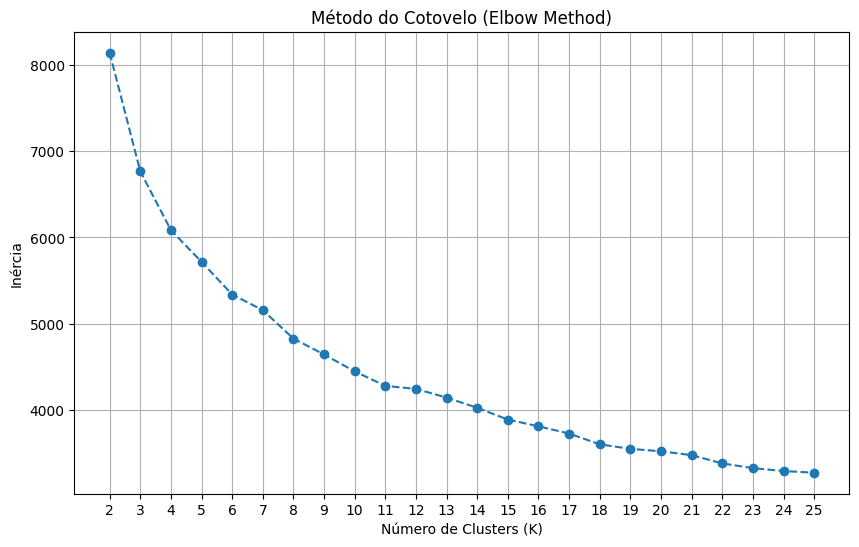

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


print("--- Preparando os Dados para Clusterização ---")
# Garantir que estamos usando apenas os dados numéricos
X_cluster = X.select_dtypes(include=['float64', 'int64'])


# Lista para armazenar os valores da inércia para cada valor de K
inercia = []
# Faixa de valores de K que vamos testar
k_range = range(2, 26) # Testaremos de 2 a 26 clusters

print("Calculando a inércia para diferentes valores de K...")
for k in k_range:
    # Cria e treina o modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster)
    
    # Armazena a inércia do modelo treinado
    inercia.append(kmeans.inertia_)

# Plotar o Gráfico do Cotovelo ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inercia, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [50]:
from sklearn.cluster import KMeans
import pandas as pd

# Definir o número de clusters que você escolheu
k_ideal = 18

print(f"Aplicando o K-Means com k={k_ideal}...")

# Inicializar e treinar o modelo K-Means
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42, n_init='auto')
kmeans_final.fit(X_cluster)

# Adicionar os rótulos dos clusters de volta ao DataFrame principal
# Isso nos permite ver a qual cluster cada vídeo pertence
df_sem_Z['kmeans_cluster'] = kmeans_final.labels_

print("\nClusterização com K-Means concluída!")
print("Amostra do DataFrame com a nova coluna de cluster:")

print(df_sem_Z[['file_name', 'kmeans_cluster']].head())

# Vamos ver quantos vídeos foram atribuídos a cada cluster
print("\nDistribuição dos vídeos por cluster:")
print(df_sem_Z['kmeans_cluster'].value_counts().sort_index())

Aplicando o K-Means com k=18...

Clusterização com K-Means concluída!
Amostra do DataFrame com a nova coluna de cluster:
           file_name  kmeans_cluster
0   Adicao_AP_1.json               7
1  Adicao_AP_10.json               7
2   Adicao_AP_2.json               7
3   Adicao_AP_3.json               7
4   Adicao_AP_4.json               7

Distribuição dos vídeos por cluster:
kmeans_cluster
0     103
1     212
2     172
3     138
4     283
5      59
6     145
7     145
8     196
9      41
10    187
11     87
12     40
13     61
14    238
15    180
16    142
17     70
Name: count, dtype: int64


Para k=18, o Score de Silhueta médio é: 0.1745

Reduzindo a dimensionalidade com PCA para visualização...
Gerando o gráfico dos clusters...


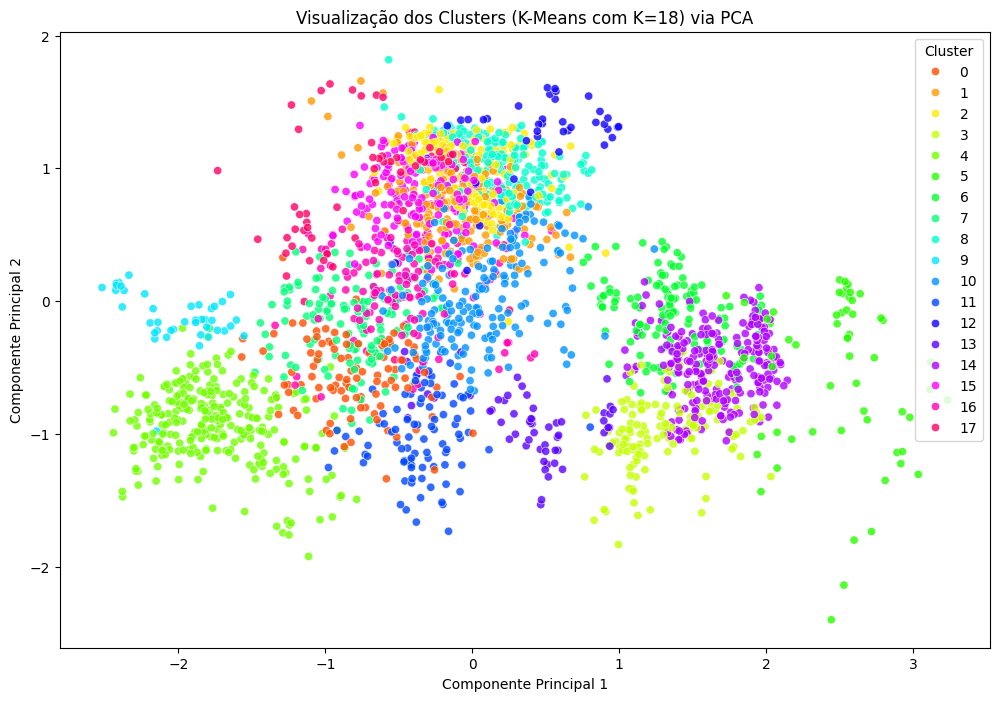

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Calcular o Score de Silhueta ---
# A métrica compara a distância média intra-cluster com a distância média inter-cluster.
# Quanto mais próximo de 1, melhor.
silhouette_avg = silhouette_score(X_cluster, df_sem_Z['kmeans_cluster'])

print(f"Para k=18, o Score de Silhueta médio é: {silhouette_avg:.4f}")


# --- 2. Visualizar os Clusters com PCA ---
print("\nReduzindo a dimensionalidade com PCA para visualização...")
# Reduzir os dados para 2 componentes principais
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

# Criar um novo DataFrame para facilitar a plotagem
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Cluster'] = df_sem_Z['kmeans_cluster']


# --- 3. Plotar o Gráfico de Dispersão ---
print("Gerando o gráfico dos clusters...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Componente Principal 1", y="Componente Principal 2",
    hue="Cluster",
    palette=sns.color_palette("hsv", n_colors=18), # Paleta de cores para os 18 clusters
    data=df_pca,
    legend="full",
    alpha=0.8
)
plt.title('Visualização dos Clusters (K-Means com K=18) via PCA')
plt.show()

### Hieraquico 

#### Linkege Ward

In [52]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Iniciando o Clustering Hierárquico (linkage='ward')...")

# Definimos o modelo com os parâmetros solicitados
hierarchical_ward = AgglomerativeClustering(n_clusters=18, linkage='ward')

# O método .fit_predict treina o modelo e retorna os rótulos dos clusters em um único passo
labels_ward = hierarchical_ward.fit_predict(X_cluster)

# Avaliar os Resultados 
# Calcular o Score de Silhueta
silhouette_ward = silhouette_score(X_cluster, labels_ward)
print(f"\nScore de Silhueta para o método 'ward': {silhouette_ward:.4f}")
# Calcular Davies-Bouldin Index e Calinski-Harabasz Index
db_index = davies_bouldin_score(X_cluster, labels_ward)
print("Davies-Bouldin Index:", db_index)
# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_cluster, labels_ward)
print("Calinski-Harabasz Index:", ch_index)

# Adicionar os rótulos ao DataFrame principal para análise
df_sem_Z['hierarchical_ward_cluster'] = labels_ward

# Analisar a Distribuição 
print("\nDistribuição dos vídeos por cluster (Hierárquico - Ward):")
print(df_sem_Z['hierarchical_ward_cluster'].value_counts().sort_index())

Iniciando o Clustering Hierárquico (linkage='ward')...

Score de Silhueta para o método 'ward': 0.1662
Davies-Bouldin Index: 1.6604682739729049
Calinski-Harabasz Index: 254.17029068674017

Distribuição dos vídeos por cluster (Hierárquico - Ward):
hierarchical_ward_cluster
0     288
1      70
2     291
3      75
4     190
5     207
6     206
7     134
8     242
9     161
10     40
11     48
12    109
13    132
14     47
15    214
16     25
17     20
Name: count, dtype: int64


#### Linkage Average

In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Iniciando o Clustering Hierárquico (linkage='Average')...")

# Definimos o modelo com os parâmetros solicitados
hierarchical_complete = AgglomerativeClustering(n_clusters=18, linkage='average')

# O método .fit_predict treina o modelo e retorna os rótulos dos clusters
labels_average = hierarchical_complete.fit_predict(X_cluster)

# Avaliar os Resultados 
# Calcular o Score de Silhueta
silhouette_complete = silhouette_score(X_cluster, labels_average)
print(f"\nScore de Silhueta para o método 'complete': {silhouette_complete:.4f}")
# Calcular Davies-Bouldin Index e Calinski-Harabasz Index
db_index = davies_bouldin_score(X_cluster, labels_average)
print("Davies-Bouldin Index:", db_index)
# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_cluster, labels_average)
print("Calinski-Harabasz Index:", ch_index)

# Adicionar os rótulos ao DataFrame principal para análise
df_sem_Z['hierarchical_complete_cluster'] = labels_average

# Analisar a Distribuição ---
print("\nDistribuição dos vídeos por cluster (Hierárquico - Complete):")
print(df_sem_Z['hierarchical_complete_cluster'].value_counts().sort_index())

Iniciando o Clustering Hierárquico (linkage='Average')...

Score de Silhueta para o método 'complete': 0.1927
Davies-Bouldin Index: 1.1339322460326453
Calinski-Harabasz Index: 165.50524734748902

Distribuição dos vídeos por cluster (Hierárquico - Complete):
hierarchical_complete_cluster
0      511
1       12
2       79
3        6
4       19
5     1073
6       47
7      189
8      301
9       29
10       1
11       1
12      10
13       1
14       1
15       3
16     175
17      41
Name: count, dtype: int64


## Avaliando cluster


In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Dicionário para mapear os nomes dos modelos às suas colunas de rótulos
model_labels = {
    'K-Means (K=18)': 'kmeans_cluster',
    'MeanShift': 'meanshift_cluster',
    'Hierárquico (Ward)': 'hierarchical_ward_cluster',
    'Hierárquico (average)': 'hierarchical_complete_cluster'
}

# Lista para armazenar os resultados
resultados = []

print("Calculando métricas de avaliação para cada modelo...")

# Loop para calcular as métricas para cada modelo
for model_name, label_column in model_labels.items():
    if label_column in df_sem_Z.columns:
        labels = df_sem_Z[label_column]
        
        # As métricas só podem ser calculadas se houver mais de 1 cluster
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_cluster, labels)
            davies_bouldin = davies_bouldin_score(X_cluster, labels)
            calinski_harabasz = calinski_harabasz_score(X_cluster, labels)
            
            resultados.append({
                'Modelo': model_name,
                'Score de Silhueta (↑)': silhouette,
                'Davies-Bouldin (↓)': davies_bouldin,
                'Calinski-Harabasz (↑)': calinski_harabasz
            })
        else:
            print(f"Aviso: O modelo '{model_name}' encontrou apenas 1 cluster. As métricas não podem ser calculadas.")
    else:
        print(f"Aviso: A coluna de cluster '{label_column}' não foi encontrada. Pulando o modelo '{model_name}'.")

# Criar um DataFrame com os resultados
df_comparacao = pd.DataFrame(resultados)
# Ordenar pelo Score de Silhueta para ver o melhor
df_comparacao = df_comparacao.sort_values(by='Score de Silhueta (↑)', ascending=False)

print("\n--- Tabela Comparativa dos Modelos de Clusterização ---")
# As setas (↑, ↓) indicam se valores maiores ou menores são melhores para cada métrica
display(df_comparacao.round(4))

Calculando métricas de avaliação para cada modelo...
Aviso: A coluna de cluster 'meanshift_cluster' não foi encontrada. Pulando o modelo 'MeanShift'.

--- Tabela Comparativa dos Modelos de Clusterização ---


Modelo  Score de Silhueta (↑)  Davies-Bouldin (↓)  \
2  Hierárquico (average)                 0.1927              1.1339   
0         K-Means (K=18)                 0.1745              1.7003   
1     Hierárquico (Ward)                 0.1662              1.6605   

   Calinski-Harabasz (↑)  
2               165.5052  
0               274.8548  
1               254.1703